# 1-Bit HHL track simulation toy model 2 particles 6 layers

This Jupyter notebook is compatible with Python 3.13, Qiskit v2.2, Qiskit Aer v0.17, Qiskit runtime version: 0.43 and Qiskit Runtime V2 primitives.
|||
|-|-|
|**Author:** |Alain Chancé|
|**Date:** |September 29, 2025|
|**Version:** |**1.00**|
# LHCb_VeLo_Toy_Model_1-Bit_HHL
An efficient implementation of the 1-Bit HHL track simulation toy model at the LHCb at CERN derived from the following publications:
- [Alain Chancé, A Toy Model For Reconstructing Particle Tracks at LHCb at CERN with Quantum Computing, 30 Oct. 2025, LHCb_VeLo_Toy_Model_1-Bit_HHL.pdf](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/LHCb_VeLo_Toy_Model_1-Bit_HHL.pdf).
- [Xenofon Chiotopoulos, Davide Nicotra, George Scriven, Kurt Driessens, Marcel Merk, Jochen Schütz, Jacco de Vries, Mark H.M. Winands, TrackHHL: The 1-Bit Quantum Filter for particle trajectory reconstruction, 12 Jan 2026, arXiv:2601.07766](https://doi.org/10.48550/arXiv.2601.07766)
- [Xenofon Chiotopoulos, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://indico.cern.ch/event/1338689/contributions/6010017/attachments/2951297/5188722/CHEP_ppt.pdf)
- Xenofon Chiotopoulos, Miriam Lucio Martinez, Davide Nicotra, Jacco A. de Vries, Kurt Driessens, Marcel Merk, and Mark H.M. Winands, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb, EPJ Web of Conferences 337, 01181 (2025), [https://doi.org/10.1051/epjconf/202533701181](https://doi.org/10.1051/epjconf/202533701181).
- [D. Nicotra et al., arXiv:2308.00619v2, 7 Oct 2023, A quantum algorithm for track reconstruction in the LHCb vertex detector](https://arxiv.org/pdf/2308.00619).

## Import libraries

In [1]:
import matplotlib.pyplot as plt

In [2]:
from One_Bit_HHL_Simulation import One_Bit_HHL

Qiskit version: 2.2.3
Qiskit Aer version: 0.17.2
Qiskit runtime version: 0.43.1


## Setup configuration parameters

In [3]:
config = {
    #--------------------
    # Simulation options
    #--------------------
    "dz": 20,                           # layer spacing (mm)
    "layers": 6,                        # Number of layers
    "n_particles": [2],                 # Number of particles
    "p_vertices": [(0,0,10)],           # Primary vertices
    #------------------
    # Noise parameters
    #------------------
    "measurement_error": 0.0,           # HIT RESOLUTION (sigma on measurement) (sigma)
    "collision_noise": 0.0,             # MULTIPLE SCATTERING (angular noise proxy)
    "ghost_rate": 1e-2,                 # Ghost (fake) track rate
    "drop_rate": 0.0,                   # Hit drop (inefficiency) rate
    #-----------------
    # Display options
    #-----------------
    "display_particles": True,          # Whether to display initial particle states
    "display_hits": True,               # Whether to display hits
    "display_ghost_hits": True,         # Whether to display ghost hits
    "display_tracks": True,             # Whether to display events and ghost tracks
    "display_clusters": False,          # Whether to display clusters found by find_tracks()
    "display_false_clusters": True,     # Whether to display clusters rejected by find_tracks()
    "display_clone_splitting": True,    # Whether to display clone splitting information
    "display_clustering": True,         # Whether to display clustering information
    "do_plot_tracks": True,             # Whether to plot events and ghost tracks 
    "do_spectrum": True,                # Whether to analyze the classical solution spectrum
    "do_print_counts": True,            # Whether to print raw measurement counts
    "resolution": 500,                  # Resolution for plots of tracks - Increase for finer mesh
    "do_draw": True,                    # Whether to draw the HHL circuit
    #---------------------------------------
    # Classical diagonalisation run options
    #---------------------------------------
    "do_solve_scipy": False,            # Whether to solve classically using scipy.sparse.linalg.cg
    "T_classical": None,                # Threshold for discretizing classical solutions
    #----------------------------------
    # Classical find_tracks parameters
    #----------------------------------
    "tol": None,                        # Tolerance for floating point comparison
    "tol_clusters": None,               # Tolerance for cluster_by_last_column()
    "tol_clone": None,                  # Tolerance for decloning tracks
    "tol_intersects": None,             # Tolerance for segment_intersects_z_axis()
    #------------------------------------------
    # Files containing token (API key) and CRN
    #------------------------------------------
    "token_file": "Token.txt",          # Token file
    "CRN_file": "CRN.txt",              # CRN file
    #-------------------------------
    # Quantum computing run options
    #-------------------------------
    "T_hhl": None,                                 # Threshold for discretizing 1-Bit HHL solutions - None: to be computed
    "backend_name": "AerSimulator noiseless",      # AerSimulator noiseless or Fake QPU or real IBM cloud backend name
    "job_id": None,                                # job_id of a previously run job
    "run_on_QPU": False,                           # Whether to run the quantum circuit on the target hardware
    "nshots": 10000,                               # Number of shots
    'opt_level': 3,                                # Optimization level
    "poll_interval": 5,                            # Poll interval in seconds for job monitor
    "timeout": 600,                                # Time out in seconds for job monitor
    #-------------------------------------
    # eco2AI Tracker options
    # https://github.com/sb-ai-lab/Eco2AI
    #-------------------------------------
    "do_eco2ai": True,                                # Whether to use the eco2AI Tracker
    "project_name": "One_Bit_HHL",                    # Project name
    "experiment_description": "HHL_2_p_6_l_find_tracks",  # Experiment description
    "eco2ai_file_name": "HHL_2_p_6_l_find_tracks.csv",    # eco2AI file name
    #---------------------------------------------------------------------------------
    # Ballpark figure (kW) for the power consumption of the IBM cloud backend
    # "The power consumption of a quantum computer is about 15-25kW"
    # https://www.capgemini.com/insights/expert-perspectives/green-quantum-computing/
    #---------------------------------------------------------------------------------
    "power_QPU": 25,                    # Ballpark figure (kW) for the power consumption of the IBM cloud backend
}

## Create an instance of the One_Bit_HHL class from the configuration dictionary

In [4]:
try:
    My_HHL = One_Bit_HHL(**config)
except Exception as e:
   print(f"Error creating 1_Bit_HHL instance: {e}")


--------------------
 Simulation options
--------------------
layer spacing (mm), dz: 20
layers: 6
n_particles: [2], Total number: 2
primary_vertices: [(0, 0, 10)]

-----------------
 Display options
-----------------
do_draw: True
display_particles: True
display_hits: True
display_ghost_hits: True
display_tracks: True
display_clusters: False
display_false_clusters: True
display_clone_splitting: True
display_clustering: True
do_plot_tracks: True
do_plot_heat_map: False
do_spectrum: True
do_print_counts: True
do_print_outer_segs False
resolution: 500

------------------
 Noise parameters
------------------
measurement hit resolution: 0.0
ghost (fake) track rate: 0.01
hit drop (inefficiency) rate: 0.0

------------------------------------------------------------------------------------------------------------------------------
 Anchoring clustering and clone splitting tolerances of the classical function find_tracks() to the parameter collision noise
------------------------------------

## Setup events


Initial particle states

Event particles
Type        Position              Direction         p/q
 MIP        (0, 0, 10)         (-0.086,  0.061)     0.46
 MIP        (0, 0, 10)         (-0.043, -0.112)     0.46

-------------------------------------------------------------
 All 12 true hits created by the function make_noisy_event()
-------------------------------------------------------------

    Hit Index   Hit ID        x         y         z       Theta      Module ID
       0           0        -0.86      0.61     20.00     2.528          1
       0           1        -2.58      1.82     40.00     2.528          2
       0           2        -4.31      3.03     60.00     2.528          3
       0           3        -6.03      4.24     80.00     2.528          4
       0           4        -7.75      5.46    100.00     2.528          5
       0           5        -9.47      6.67    120.00     2.528          6
       0           6        -0.43     -1.12     20.00    -1.937         

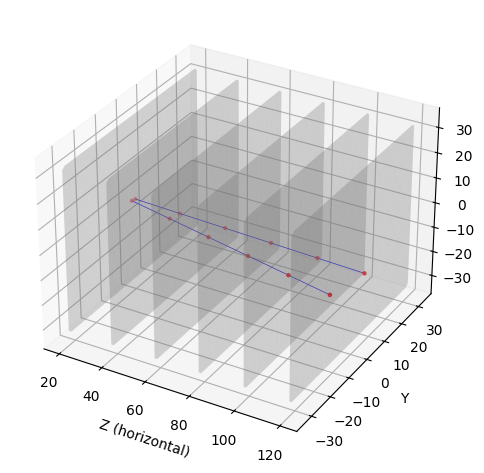


------------------------------------------------
 Polar plot of hits projected onto the XY plane
------------------------------------------------


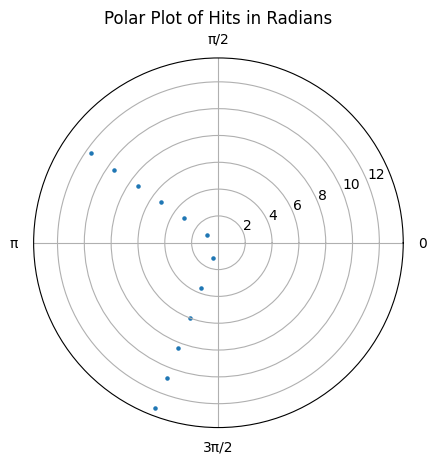


------------------------------------------------------
 ✅ Function setup_events() completed in 5.07 seconds 
------------------------------------------------------


In [5]:
My_HHL.setup_events()

## Run classical and 1-Bit HHL simulations


-------------------------------------------------------------------------------------------
 find_tracks() - Refined tol_clusters_est = 1.0000e-07 (mean intra-cluster std=2.2204e-16)
-------------------------------------------------------------------------------------------

--------------------------------------------
 ✅ find_tracks() completed in 0.00 seconds 
--------------------------------------------

--------------------------------------
 find_tracks() found a primary vertex
--------------------------------------
(0.000, 0.000, 10.000)

------------------------------
 find_tracks() found 2 tracks
------------------------------

--------------------------------------------------
 All 2 tracks found by the function find_tracks()
--------------------------------------------------

Track ID: 0

    Hit Index   Hit ID        x         y         z       Theta      Module ID
       0           0        -0.86      0.61     20.00     2.528          1
       1           1        -2.58  

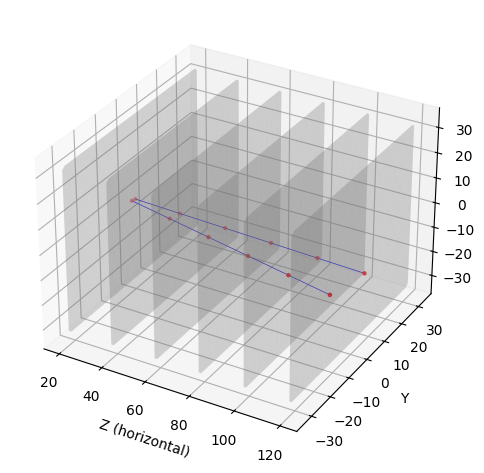


Classical processing - Duration (h): 0.0042 - Power consumption (kWh): 0.0000


In [6]:
My_HHL.run_simulation()

In [1]:
# Display Markdown file from the GitHub repository LHCb_VeLo_Toy_Model_1-Bit_HHL
import requests
from IPython.display import Markdown, display

url = "https://raw.githubusercontent.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/main/README.md"

response = requests.get(url)
response.raise_for_status()  # ensures errors are visible

display(Markdown(response.text))

# LHCb_VeLo_Toy_Model_1-Bit_HHL
Fast particle track reconstruction in the LHCb VELO using classical angle sorting and Ising-like optimization.

# The Large Hadron Collider beauty (LHCb) experiment at CERN
The LHCb experiment at CERN is a general-purpose detector at the Large Hadron Collider (LHC) that specializes in investigating the subtle differences between matter and antimatter by studying a type of particle called the *beauty quark*, or *b quark*.

It uses a series of subdetectors to detect mainly forward particles—those produced in one forward direction by the collision. The first subdetector is mounted close to the collision point, with the others following sequentially over a length of 20 meters.

The 5600-tonne LHCb detector consists of a forward spectrometer and planar detectors. It is 21 meters long, 10 meters high, and 13 meters wide, and is located 100 meters underground near the town of Ferney-Voltaire, France.

As of 2024, the collaboration includes more than 1600 members from 98 institutes in 22 countries, including around 1100 authors.

Source: [https://home.cern/science/experiments/lhcb](https://home.cern/science/experiments/lhcb)

### LHCb Taking a closer look at LHC
[LHC-1] [The Large Hadron Collider beauty (LHCb) experiment](https://home.cern/science/experiments/lhcb)

[LHC-2] [LHCb Taking a closer look at LHC](https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.lhcb)

---

# Particle track reconstruction in the LHCb Vertex Locator (VELO)
In the High-Luminosity phase of the Large Hadron Collider (HL-LHC), thousands of particles are produced simultaneously. These particles leave energy hits in detector layers, which are reconstructed into particle tracks. Tracks reveal primary vertices (collision points).

Tracks in the LHCb Vertex Locator (VELO) can be modeled as straight lines intersecting the *z*-axis, since the VELO is the subdetector closest to the LHCb collision point and experiences a negligible magnetic field.

---

## Classical sort-by-angle (θ) particle track reconstruction
In the *XY* projection, these straight lines pass through the origin. As a result, energy hits are expected to have a nearly constant phase in polar coordinates when projected onto the *XY* plane (see Section 3, *Search by triplet — Sort by φ*, in [ALGO-4](https://arxiv.org/pdf/2207.03936)).

We have developed the following functions:

* `plot_hits_polar()`, which displays a polar plot (in radians) of hits projected onto the *XY* plane.
  Example:
  [Polar_Plot_8_p_6_l_noiseless.png](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/8_particles/6_layers/Noiseless/Polar_Plot_8_p_6_l_noiseless.png)
* `cluster_by_last_column()`, which clusters hits by the polar angle `theta` in the last column of a hit array.
* `create_tracks()`, which builds a single track from a cluster of hits (no clone splitting here).
* `segment_intersects_z_axis()`, which checks whether a line intersects the *z*-axis and computes the corresponding primary vertex.
* `find_tracks()`, which reconstructs tracks from these clusters and identifies all primary vertices.

## Split clone tracks by direction
We have developed the function `split_clone_by_direction()` which splits a θ-cluster into physically distinct clone tracks by clustering the 3D direction vectors of consecutive hit segments. A θ-cluster groups hits with similar azimuthal angle φ. When multiple particles share nearly identical φ (common in dense VELO-like geometries), they may be merged into a single cluster. These "clone clusters" must be separated into individual tracks. The most stable discriminator between clone tracks is the *direction* of their local segments. For a true straight track, the direction vector between consecutive modules is nearly constant. Clone tracks, even if close in φ, exhibit distinct 3D directions.

### Efficient implementation
The function `find_tracks()` successfully reconstructs toy events with several thousand particles in well under a second, as demonstrated in the following Jupyter notebooks:

* [1024_particles/7_layers/Find_tracks](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/1024_particles/7_layers/Find_tracks/HHL_1024_particles_7_layers_find_tracks.ipynb)
* [2256_particles/8_layers/Find_tracks](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/2256_particles/8_layers/Find_tracks/HHL_2256_particles_8_layers_find_tracks.ipynb)
* [5000_particles/7_layers/Find_tracks](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/5000_particles/7_layers/Find_tracks/HHL_5000_particles_7_layers_find_tracks.ipynb)

### Note on computational complexity
The computational bottleneck in the function `cluster_by_last_column()` is the comparison-based sorting step, for which both classical and bounded-error quantum query complexities are $O(n. \log n)$; quantum algorithms do not reduce the asymptotic number of comparisons required.

Høyer, P.; Neerbek, J.; Shi, Y. (2001). *Quantum complexities of ordered searching, sorting, and element distinctness*.
28th International Colloquium on Automata, Languages, and Programming. Lecture Notes in Computer Science, Vol. 2076, pp. 62–73.
[arXiv:quant-ph/0102078](https://arxiv.org/abs/quant-ph/0102078)

### Efficient algorithms for track reconstruction
[ALGO-1] [Alain Chancé, A Toy Model For Reconstructing Particle Tracks at LHCb at CERN with Quantum Computing, 30 Oct. 2025, LHCb_VeLo_Toy_Model_1-Bit_HHL.pdf](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/LHCb_VeLo_Toy_Model_1-Bit_HHL.pdf)

[ALGO-2] [Aaij, R., Adinolfi, M., Aiola, S. et al. A Comparison of CPU and GPU Implementations for the LHCb Experiment Run 3 Trigger. Comput Softw Big Sci 6, 1 (2022)](https://doi.org/10.1007/s41781-021-00070-2)

[ALGO-3] [Daniel Campora, Track reconstruction made easy, 2021](https://github.com/dcampora/velopix_tracking)

[ALGO-4] [Cámpora Pérez, D. H., Neufeld, N. & Riscos Núñez, A. Search by triplet: An efficient local track reconstruction algorithm
for parallel architectures. J. Comput. Sci. 54, 101422, DOI: 10.1016/j.jocs.2021.101422 (2021)](https://arxiv.org/pdf/2207.03936)

[ALGO-5] [Aaij, R., Albrecht, J., Belous, M. et al. Allen: A High-Level Trigger on GPUs for LHCb. Comput Softw Big Sci 4, 7 (2020). https://doi.org/10.1007/s41781-020-00039-7](https://doi.org/10.1007/s41781-020-00039-7)

[ALGO-6] [The CMS Collaboration, Description and performance of track and primary-vertex reconstruction with the CMS tracker, arXiv:1405.6569v2, physics.ins-det, 28 Oct 2014](https://doi.org/10.48550/arXiv.1405.6569)

[ALGO-7] [Primary Vertex Reconstruction at LHCb, LHCb-PUB-2014-044, October 21, 2014](https://cds.cern.ch/record/1756296/files/LHCb-PUB-2014-044.pdf)

---

## Ising-like optimization using matrix inversion
The Hamiltonian $𝐻(𝑆)$ is parametrized in terms of doublets $𝑆$, these doublets are possible connections between two hits in subsequent detector layers and take a binary value to indicate if they actively contribute to a track, $S_i \in${0, 1}. It includes three terms:

- The angular term $𝐻_{𝑎𝑛𝑔}$ is the most important as it determines if a set of doublets $𝑆_𝑖$ and $𝑆_𝑗$ are aligned within $\varepsilon$.
- $𝐻_{spec}(𝑆)$ makes the spectrum of $A$ positive.
- $𝐻_{gap}(𝑆)$ ensures gap in the solution spectrum.

$$𝐻(𝑆) = 𝐻_{𝑎𝑛𝑔}(𝑆,\varepsilon)+\gamma𝐻_{spec}(𝑆)+\delta𝐻_{gap}(𝑆)$$

$$H_{\text{ang}}(S,\varepsilon) = -\frac{1}{2} \left[ \sum_{abc} f(\theta_{abc}, \varepsilon) S_{ab} S_{bc} \right]$$

$$𝐻_{spec}(𝑆)=\sum_{𝑎𝑏} 𝑆_{𝑎𝑏}^2$$

$$𝐻_{gap}(𝑆)=\sum_{𝑎𝑏} (1−2S_{𝑎𝑏})^2)$$

$$
f(\theta_{abc}, \varepsilon) =
\begin{cases}
1 & \text{if } \cos(\theta_{abc}) \geq 1 - \varepsilon \\
0 & \text{otherwise}
\end{cases}
$$

$$𝐻(𝑆)=−\frac{1}{2} \left[\sum_{abc} f(\theta_{abc}, \varepsilon) S_{ab} S_{bc} + \gamma\sum_{𝑎𝑏} 𝑆_{𝑎𝑏}^2 + \delta\sum_{𝑎𝑏} (1−2S_{𝑎𝑏} )^2\right]$$ 

By relaxing $𝑆_𝑖\inℝ$, we find its minimum by taking the derivative of the quadratic $𝐻$, obtaining a system of linear equations:

$$∇_𝑆 H=−AS+b=0,  AS=b$$

Matrix inversion yields the solution of reconstructed tracks. The resulting vector $𝑆$ of real values is subsequently discretized to obtain an "on"/"off" status by setting a threshold $𝑇$.

---

## Solving the system of linear equations classically
The function `classical_simulation()` of the class `One_Bit_HHL` in the module `One_Bit_HHL_Simulation.py` uses only the first three layers of the toy event created by the function `setup_events()` in the same module.

The system of linear equations $𝐴𝑆=𝑏$ is solved using [scipy.sparse.linalg.cg](https://docs.scipy.org/doc/scipy-1.12.0/reference/generated/scipy.sparse.linalg.cg.html):

```python
sol, _ = sci.sparse.linalg.cg(A, vector_b, atol=0)
```
The discretized solution is obtained by setting a threshold `T_classical` in the list of configuration parameters `param`:
```python
T_classical = param["T_classical"]
disc_sol = (sol > T_classical).astype(int)
```

---

## Solving the system of linear equations with the 1-Bit HHL algorithm
The Harrow–Hassidim–Lloyd (HHL) algorithm promises a complexity improvement over the best classical alternatives for solving sparse systems of linear equations. However, its practical implementation faces considerable challenges. The Quantum Phase Estimation (QPE) step results in prohibitively deep circuits, making the algorithm unfeasible on currently available hardware short of fault-tolerant quantum computing.

The 1-Bit HHL algorithm, presented in the paper [TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://doi.org/10.1051/epjconf/202533701181), applies a first-order Suzuki–Trotter decomposition to approximate the time-evolution operator. By restricting the QPE accuracy to a single bit, the algorithm can efficiently determine whether a phase is close to zero or significantly different.

The function `HHL_simulation()` of the class `One_Bit_HHL` in the module `One_Bit_HHL_Simulation.py` uses only the first three layers of the toy event created by the function `setup_events()` in the same module.

The discretized solution is obtained by setting a threshold `T_hhl` in the list of configuration parameters `param`:
```python
T_hhl = param["T_hhl"]
disc_x_hhl = (x_hhl > T_hhl).astype(int)
```

---

### TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb
[TRHHL-1] [Xenofon Chiotopoulos, Davide Nicotra, George Scriven, Kurt Driessens, Marcel Merk, Jochen Schütz, Jacco de Vries, Mark H.M. Winands, TrackHHL: The 1-Bit Quantum Filter for particle trajectory reconstruction, 12 Jan 2026, arXiv:2601.07766](https://doi.org/10.48550/arXiv.2601.07766)

[TRHHL-2] [Xenofon Chiotopoulos, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://cds.cern.ch/record/2950969/files/document.pdf)

[TRHHL-3] [Xenofon Chiotopoulos, Miriam Lucio Martinez, Davide Nicotra, Jacco A. de Vries, Kurt Driessens, Marcel Merk, and Mark H.M. Winands, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb, EPJ Web of Conferences 337, 01181 (2025)](https://doi.org/10.1051/epjconf/202533701181)

[TRHHL-4] [Okawa, Hideki, Quantum Algorithms for Track Reconstruction at High Energy Colliders, Workshop of Tracking in Particle Physics Experiments, May 17-19, 2024](https://indico.ihep.ac.cn/event/21775/contributions/155907/attachments/78247/97329/okawa_QTrack_20240517.pdf)

[TRHHL-5] [D. Nicotra et al., arXiv:2308.00619v2, 7 Oct 2023, A quantum algorithm for track reconstruction in the LHCb vertex detector](https://arxiv.org/pdf/2308.00619)

---

## Efficient implementation of the Ising-like optimization

### Fast construction of the Hamiltonian $H(S)$
The function `construct_segments()` of the class `SimpleHamiltonian` in the module [toy_model/simple_hamiltonian.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/simple_hamiltonian.py) is enhanced to identify segments with matching values of `theta` during their creation and to append them to the list `segment_in_indices`, along with their corresponding segment IDs in the list `segment_indices`. The function `construct_hamiltonian()` then considers only doublets $S_i$ and $S_j$ of segments in `segment_in_indices`. This modification significantly improves the performance of the preprocessing step.

---

### Smart error detection and recovery
In his talk [*Dynamic Circuit and Error Detection* (QDC 2025)](https://www.youtube.com/watch?v=GO7fiYEKIVw), Alireza Seif pointed out that the sampling overhead of quantum error mitigation (QEM) scales exponentially with circuit size, while quantum error correction (QEC) requires a large number of qubits (see the slide titled *“Quantum Error Mitigation – Quantum Error Correction”*, around 0:30 in the talk).

Quantum error detection (QED) uses additional qubits to reduce sampling costs and operates in a single-shot manner, similar to QEC. Alireza also explained that one way to achieve QEC is by measuring conserved quantities of a physical system.

We apply a quantum error detection approach as a post-processing step consistent with the IBM Qiskit pattern methodology (*Post-process results*):

*“This can involve a range of classical data-processing steps, such as … or post-selection based on inherent properties of the problem …”*

(see [Introduction to Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns)).

The function `get_tracks_smart()` of the class `One_Bit_HHL` in
[One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py)
performs the following steps:

* Identifies active segments in the first three layers from both the classical solution and the 1-bit HHL quantum solution
* Reconstructs tracks using only segments that intersect the z-axis
* Adds missed segments intersecting the z-axis and extends active segments to all outer layers

The function `segment_intersects_z_axis()` computes segment–axis intersections. The intersection points define the reconstructed primary vertices.

The function `analyze_p_vertices()` clusters and summarizes primary-vertex candidates identified by `segment_intersects_z_axis()`. It groups vertices by z-value and returns averaged primary-vertex (PV) positions.

A simulated primary vertex is considered reconstructed if a vertex is found within 2 mm of its true position. See *Primary Vertex Reconstruction Efficiency and Resolution* in [ALGO-2]:
[Aaij, R., Adinolfi, M., Aiola, S. et al. *A Comparison of CPU and GPU Implementations for the LHCb Experiment Run 3 Trigger*. Comput Softw Big Sci 6, 1 (2022)](https://doi.org/10.1007/s41781-021-00070-2).

---

### Quantum error mitigation, detection, and correction

[ERR-1] [Ian Hincks — *Samplomatic and Its Use Cases* (QDC 2025)](https://www.youtube.com/watch?v=mZB3SxQMsiI)

[ERR-2] [Andrew Eddins — *Error Mitigation Landscape* (QDC 2025)](https://www.youtube.com/watch?v=ix52wx4_zek)

[ERR-3] [Alireza Seif — *Dynamic Circuit and Error Detection* (QDC 2025)](https://www.youtube.com/watch?v=GO7fiYEKIVw)

[ERR-4] [Maika Takita — *Dynamic Circuit and Error Detection* (QDC 2025)](https://www.youtube.com/watch?v=rs3nlhRK7So)

[ERR-5] [van den Berg, E., Minev, Z. K., Kandala, A. et al.
*Probabilistic error cancellation with sparse Pauli–Lindblad models on noisy quantum processors.*
Nat. Phys. 19, 1116–1121 (2023). https://doi.org/10.1038/s41567-023-02042-2](https://doi.org/10.1038/s41567-023-02042-2)

---

# Installation

## Requirements
Be sure you have the following installed:

* Qiskit SDK v2.1 or later, with visualization support (`pip install 'qiskit[visualization]'`)
* 'qiskit-aer' library (`pip install qiskit-aer`)
* Qiskit runtime 0.40 or later (`pip install qiskit-ibm-runtime`)
* [eco2AI](https://github.com/sb-ai-lab/Eco2AI) is optional (`pip install eco2ai`)

## Clone the repository LHCb_VeLo_Toy_Model_1-Bit_HHL
`git clone https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL`

---

# Set-up your own 1-Bit HHL track simulation toy model simulation
Duplicate the Jupyter notebook [HHL_1024_particles_7_layers_find_tracks.ipynb](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/1024_particles/7_layers/Find_tracks/HHL_1024_particles_7_layers_find_tracks.ipynb), rename it and customize the configuration parameters:
```python
config = {
    #--------------------
    # Simulation options
    #--------------------
    "dz": 20,                           # layer spacing (mm)
    "layers": 7,                        # Number of layers
    "n_particles": [256, 256, 256, 256],    # Number of particles
    "p_vertices": [(0,0,4), (0,0,6), (0,0,8), (0,0,10)],  # Primary vertices
    #------------------
    # Noise parameters
    #------------------
    "measurement_error": 0.0,           # HIT RESOLUTION (sigma on measurement) (sigma)
    "collision_noise": 1.0e-7,          # MULTIPLE SCATTERING (angular noise proxy)
    "ghost_rate": 1e-2,                 # Ghost (fake) track rate
    "drop_rate": 0.0,                   # Hit drop (inefficiency) rate
    #-----------------
    # Display options
    #-----------------
    "display_particles": False,         # Whether to display initial particle states
    "display_hits": False,              # Whether to display hits
    "display_ghost_hits": True,         # Whether to display ghost hits
    "display_tracks": False,            # Whether to display events and ghost tracks
    "display_clusters": False,          # Whether to display clusters found by find_tracks()
    "display_false_clusters": True,     # Whether to display clusters rejected by find_tracks()
    "display_clone_splitting": True,    # Whether to display clone splitting information
    "display_clustering": True,         # Whether to display clustering information
    "do_plot_tracks": False,            # Whether to plot events and ghost tracks 
    "do_spectrum": False,               # Whether to analyze the classical solution spectrum
    "do_print_counts": False,           # Whether to print raw measurement counts
    "resolution": 2000,                 # Resolution for plots of tracks - Increase for finer mesh
    "do_draw": False,                   # Whether to draw the HHL circuit
    #----------------------------------
    # Classical find_tracks parameters
    #----------------------------------
    "tol": None,                        # Tolerance for floating point comparison
    "tol_clusters": None,               # Tolerance for cluster_by_last_column()
    "tol_clone": None,                  # Tolerance for decloning tracks
    "tol_intersects": None,             # Tolerance for segment_intersects_z_axis()
    #---------------------------------------------------------------------------------------------------------
    # A simulated primary vertex is defined as reconstructed if a primary vertex is found within 2 mm 
    # of its true position. See Primary Vertex Reconstruction Efficiency and Resolution in [ALGO-2]
    # [Aaij, R., Adinolfi, M., Aiola, S. et al. A Comparison of CPU and GPU Implementations for the LHCb 
    # Experiment Run 3 Trigger. Comput Softw Big Sci 6, 1 (2022)](https://doi.org/10.1007/s41781-021-00070-2)
    #---------------------------------------------------------------------------------------------------------
    "tol_vertices": None,               # Tolerance for clustering primary vertices (mm)
    #---------------------------------------
    # Classical diagonalisation run options
    #---------------------------------------
    "do_solve_scipy": False,            # Whether to solve classically using scipy.sparse.linalg.cg
    "T_classical": None,                # Threshold for discretizing classical solutions
    #------------------------------------------
    # Files containing token (API key) and CRN
    #------------------------------------------
    "token_file": "Token.txt",          # Token file
    "CRN_file": "CRN.txt",              # CRN file
    #-------------------------------
    # Quantum computing run options
    #-------------------------------
    "T_hhl": None,                                      # Threshold for discretizing 1-Bit HHL solutions - None: to be computed
    "backend_name": "AerSimulator noiseless",           # AerSimulator noiseless or Fake QPU or real IBM cloud backend name
    "job_id": None,                                     # job_id of a previously run job
    "run_on_QPU": False,                                # Whether to run the quantum circuit on the target hardware
    "nshots": 2000000,                                  # Number of shots
    'opt_level': 1,                                     # Optimization level
    "poll_interval": 5,                                 # Poll interval in seconds for job monitor
    "timeout": 600,                                     # Time out in seconds for job monitor
    #-------------------------------------
    # eco2AI Tracker options
    # https://github.com/sb-ai-lab/Eco2AI
    #-------------------------------------
    "do_eco2ai": True,                                   # Whether to use the eco2AI Tracker
    "project_name": "One_Bit_HHL",                       # Project name
    "experiment_description": "HHL_1024_p_7_l_find_tracks", # Experiment description
    "eco2ai_file_name": "HHL_1024_p_7_l_find_tracks.csv",   # eco2AI file name
    #---------------------------------------------------------------------------------
    # Ballpark figure (kW) for the power consumption of the IBM cloud backend
    # "The power consumption of a quantum computer is about 15-25kW"
    # https://www.capgemini.com/insights/expert-perspectives/green-quantum-computing/
    #---------------------------------------------------------------------------------
    "power_QPU": 25,                    # Ballpark figure (kW) for the power consumption of the IBM cloud backend
}
```

---

# Credits
The Jupyter notebooks in this repository [LHCb_VeLo_Toy_Model_1-Bit_HHL](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL) and the Python file [One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py) are derived from the following sources:

* GitHub repository [OneBQF](https://github.com/Xenofon-Chiotopoulos/OneBQF/tree/main) owned by Xenofon Chiotopoulos and more specifically:
   - Module [OneBQF.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/quantum_algorithms/OneBQF.py)
   - Jupyter notebook [example.ipynb](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/example.ipynb).

* GitHub repository [LHCb VELO Toy Model](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/tree/main#lhcb-velo-toy-model) owned by George William Scriven, [GeorgeWilliam1999](https://orcid.org/0009-0004-9997-1647).

* Relevant documentation can be found in the Jupyter notebook [Tracking Toy Model Demo](https://github.com/Xenofon-Chiotopoulos/Tracking_Toy_model/blob/main/example_notebook.ipynb) in the public repository [Tracking_Toy_model](https://github.com/Xenofon-Chiotopoulos/Tracking_Toy_model/tree/main) owned by Xenofon Chiotopoulos.

---

# Additions by Alain Chancé

## Energetics Analysis
* **Assumption:**
  A ballpark estimate for a typical modern IBM-class superconducting quantum computer (including cryogenics and supporting infrastructure, while idle or lightly used) is approximately **15–25 kW**.
  Source: [*Green Quantum Computing*, Capgemini, 8 May 2023](https://www.capgemini.com/insights/expert-perspectives/green-quantum-computing/).

* The `One_Bit_HHL` class integrates the [eco2AI](https://github.com/sb-ai-lab/Eco2AI) tracking feature, a python library which accumulates statistics about power consumption and CO2 emission during running code. The Eco2AI is licensed under a [Apache licence 2.0](https://www.apache.org/licenses/LICENSE-2.0).

## Quantum computing energetics
[EN-1] [informatique quantique état de l’art, perspective et défis, Olivier Ezratty, SFGP, Paris, 5 novembre 2025](https://www.oezratty.net/Files/Conferences/Olivier%20Ezratty%20Informatique%20Quantique%20SFGP%20Nov2025.pdf) 

[EN-2] [Q2B25 Paris | Olivier Ezratty, Academic, Co Founder, Free Electron, EPITA, Quantum Energy Initiative, 
QC Ware, September 24-25 2025](https://www.youtube.com/watch?v=JVtm3pbesnA)

---

## Class ToleranceEstimator
The class ToleranceEstimator provides unified statistical estimators for:
  - φ-clustering tolerance (tol_clusters_est)
  - clone-track splitting tolerance (tol_clone_est)

```python
class ToleranceEstimator:
    """
    Unified statistical estimators for:
      - φ-clustering tolerance (tol_clusters_est)
      - clone-track splitting tolerance (tol_clone_est)
    """
```
### Function estimate_intra_cluster_theta_std
```python
    @staticmethod
    def estimate_intra_cluster_theta_std(clusters, layers, 
                                         n_sample_clusters=5,
                                         alpha=1.0,
                                         tol_min=1e-4,
                                         tol_max=1e-2):
        """
        Estimate tol_clusters_est from intra-cluster θ spread.
        """
        if len(clusters) == 0:
            return None

        sample_indices = np.random.choice(
            len(clusters),
            size=min(n_sample_clusters, len(clusters)),
            replace=False
        )

        intra_stds = []

        for ci in sample_indices:
            c = clusters[ci]
            if len(c) < 2:
                continue

            theta_vals = c[:, 6]

            if len(theta_vals) > layers:
                theta_vals = theta_vals[:layers]

            intra_stds.append(np.std(theta_vals))

        if not intra_stds:
            return None

        mean_std = np.mean(intra_stds)
        tol = max(alpha * mean_std, tol_min)
        tol = min(tol, tol_max)

        return tol, mean_std
```

### Function estimate_clone_tolerance
The scale factor alpha determines how many sigmas define a decloning boundary.
```python
    @staticmethod
    def estimate_clone_tolerance(track_hits,
                                 alpha=1.0,
                                 tol_min=1e-6,
                                 tol_max=1e-2,
                                 alpha_dyn=True):

        if len(track_hits) < 2:
            return tol_min, 0.0

        temp_segments = []
        for i in range(len(track_hits) - 1):
            # Only build a segment if module_id increases
            if track_hits[i+1].module_id > track_hits[i].module_id:
                s = Segment(
                    hits=[track_hits[i], track_hits[i+1]],
                    segment_id=i
                )
                temp_segments.append(s)

        if not temp_segments:
            return tol_min, 0.0

        theta_seg_values = np.array([s.theta for s in temp_segments], dtype=float)
        theta_seg_std = np.std(theta_seg_values)

        #-------------------------------------------------------------------------------
        # The scale factor alpha determines how many sigmas define a decloning boundary
        # Adapt alpha dynamically
        #-------------------------------------------------------------------------------
        if alpha_dyn:
            if theta_seg_std < 1.0e-6:
                alpha = 1.0
            elif theta_seg_std > 1.0e-3:
                alpha = 1.5
            else:
                alpha = 1.2

        tol_clone_est = max(alpha * theta_seg_std, tol_min)
        tol_clone_est = min(tol_clone_est, tol_max)

        return tol_clone_est, theta_seg_std
```

---

## Module One_Bit_HHL_Simulation.py
The module [One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py) defines a new class `One_Bit_HHL`.

### New data structures of the class One_Bit_HHL
The function `find_tracks()` of the class `One_Bit_HHL` in the module [One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py) creates the following data structures and stores them in the parameter list `self.param`:

  - `hit_by_index`: dictionary keyed by the index of the `hit`. Indices are always unique, even when `hit_id` is not.
  - `array_hits`: NumPy array of hits with `theta` as last column.

```python
hit_by_index = {i: hit for i, hit in enumerate(list_hits)}
param["hit_by_index"] = hit_by_index
```

```python
array_hits = np.array([ [i, hit.hit_id, hit.x, hit.y, hit.z, hit.module_id, hit.theta] for i, hit in enumerate(list_hits) ], dtype=float)
param["array_hits"] = array_hits
```

The function `setup_Hamiltonian()` of the class `One_Bit_HHL` stores in the parameter list the following lists returned by the function `construct segments()` in the module `simple_hamiltonian.py`:

```python
    ham.construct_segments(event=event_tracks)

    param["segment_indices"] = ham.segment_indices
    param["segment_in_indices"] = ham.segment_in_indices
```

### New properties of the class SimpleHamiltonian
The module [AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/toy_model/simple_hamiltonian.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/simple_hamiltonian.py) is derived from the module [Xenofon-Chiotopoulos/OneBQF/toy_model/simple_hamiltonian.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/toy_model/simple_hamiltonian.py).

The following properties have been added:
  - `segment_in_indices`: list of segments with matching values of `theta`
  - `segment_indices`: list of corresponding segment ID's

```python
    self.segment_indices = [segment.segment_id for segment in self.segment_in_indices]
```

### Updated data classes in the module state_event_model.py
The module [AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/toy_model
/state_event_model.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/state_event_model.py) is derived from the module [Xenofon-Chiotopoulos/OneBQF/toy_model/state_event_model.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/toy_model/state_event_model.py).

The following import statements have been added or updated:
```python
from dataclasses import dataclass, field
import math
```

In the data class `Hit`, the following two fields have been added:
  - `theta` stores the phase of a hit in polar coordinates when projected onto the XY plane
  - `index`: stores the index of the hit in an array of hits

```python
theta: float = field(init=False)  # Phase in polar coordinates when projected onto the XY plane
index: int = field(init=False)    # Index of the hit in an array of hits

def __post_init__(self): 
    self.theta = math.atan2(self.y, self.x)
    self.index = 0
```

In the data class `Segment`, new fields `module_id`, `track_id` and `theta` have been added:
```python
module_id: int = field(init=False)  # Module id of the hit in the outer module
track_id: int = field(init=False)   # Track id of the hit in the outer module
theta: float = field(init=False)    # Phase in polar coordinates when projected onto the XY plane

def __post_init__(self):
    self.module_id = self.hits[1].module_id
    self.track_id = self.hits[1].track_id
    self.theta = math.atan2(self.hits[1].y - self.hits[0].y, self.hits[1].x - self.hits[0].x)

def p0(self):
    return [self.hits[0].x, self.hits[0].y, self.hits[0].z]

def p1(self):
    return [self.hits[1].x, self.hits[1].y, self.hits[1].z]
```

In the data class `Event`, a new field `ghost_hits` has been added: 
```python
ghost_hits: []
```

---

## Anchoring clustering and clone splitting tolerances to the parameter collision noise
The parameter `collision_noise` sets the angular noise scale in `theta` (or `phi`) according to the following rules:
  - θ-clustering (φ-clustering): `tol_clusters` = `10 * collision_noise`
  - clone tracks splitting: `tol_clone` = `3 * collision_noise`
  - Tolerance for `segment_intersects_z_axis()`: `tol_intersects` = `1.0e4 * collision_noise`

The `_init_` function of the of the class `One_Bit_HHL` in the module [One_Bit_HHL_Simulation.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/One_Bit_HHL_Simulation.py) sets the default parameters as follows:

```python
        if collision_noise is None:
            collision_noise = 0.0
            
        if tol is None:
            tol = 1.0e-7

        if tol_clusters is None:
            tol_clusters = max(10.0 * collision_noise, tol)

        if tol_clone is None:
            tol_clone = max(3.0 * collision_noise, tol)
            
        if tol_intersects is None:
            tol_intersects = min(max(1.0e4 * collision_noise, tol), 2.0)

        text = f" Anchoring clustering and clone splitting tolerances of the classical function find_tracks() to the parameter collision noise"
        line = "-" * (len(text) + 1)
        print(f"\n{line}\n{text}\n{line}")
        
        print(f"Multiple scattering collision noise, collision_noise: {collision_noise:.2e}")
        print(f"Tolerance for floating point comparison, tol: {tol:.2e}")
        print(f"Minimum value of the tolerance for clustering, cluster_by_last_column(), tol_clusters: {tol_clusters:.2e}")
        print(f"Minimum value of the decloning tolerance, tol_clone: {tol_clone:.2e}")
        print(f"Tolerance for segment_intersects_z_axis(), tol_intersects: {tol_intersects:.2e}")
```

## Setting up the tolerance for clustering vertices
The tolerance for clustering vertices is set to 1 mm with the aim of finding every primary vertex within 2 mm of its true position.
  - Tolerance for clustering vertices: `tol_vertices` = `1.0`

```python
        if tol_vertices is None:
            tol_vertices = 1.0    # 1 mm

        print(f"Tolerance for clustering vertices, tol_vertices: {tol_vertices:.2e}")
```

---

## New functions of the class One_Bit_HHL in the module One_Bit_HHL_Simulation.py
The following functions are copied from the class SQD in [SQD_Alain.py](https://github.com/AlainChance/SQD_Alain/blob/main/SQD_Alain.py):
  - setup_backend()
  - check_size()
  - get_QPU_usage()
  - get_classical_power_usage()

The following function is derived from the module [OneBQF/toy_model/simple_hamiltonian.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/toy_model/simple_hamiltonian.py):
- find_segments() derived from function find_segments()

New functions:
  - analyze_p_vertices()
  - check_intersection()
  - classical_simulation()
  - cluster_by_last_column()
  - create_tracks()
  - display_all_clusters()
  - display_all_hits()
  - display_all_tracks()
  - display_p_vertices()
  - find_tracks()
  - gen_indices()
  - get_tracks_smart()
  - HHL_simulation()
  - intersects_origin()
  - intersects_z_axis()
  - plot_event()
  - plot_hits_polar()
  - setup_Hamiltonian()
  - run_qc()
  - run_simulation()
  - segment_intersects_z_axis()

---

### Function analyze_p_vertices
This function clusters and summarizes primary-vertex candidates found by the function `segment_intersects_z_axis()` which performs segment–axis intersections. It groups vertices by z-value and returns averaged primary vertex (PV) positions. 

A simulated primary vertex is defined as reconstructed if a primary vertex is found within 2 mm of its true position. See *Primary Vertex Reconstruction Efficiency and Resolution*, in [ALGO-2]
[Aaij, R., Adinolfi, M., Aiola, S. et al. A Comparison of CPU and GPU Implementations for the LHCb Experiment Run 3 Trigger. Comput Softw Big Sci 6, 1 (2022)](https://doi.org/10.1007/s41781-021-00070-2).

```python
    def analyze_p_vertices(self, found_p_vertices, tol_vertices):
        """
        Cluster and summarize primary-vertex candidates found by segment–axis intersections.
        Groups vertices by z-value and returns averaged PV positions.
        """

        if not found_p_vertices:
            return []

        # Extract z-values
        z_values = np.array([xyz[2] for xyz in found_p_vertices])

        # Build array for 1-D clustering
        array_z = np.array([[i, z] for i, z in enumerate(z_values)], dtype=float)

        # Cluster by z using existing machinery
        clusters = self.cluster_by_last_column(array_z, tol=tol_vertices)

        primary_vertices = []
        for cluster in clusters:
            idxs = cluster[:,0].astype(int)
            z_cluster = z_values[idxs]
            z_mean = np.mean(z_cluster)

            # x,y are zero in the toy-model, but we compute them anyway for future realism
            x_mean = np.mean([found_p_vertices[i][0] for i in idxs])
            y_mean = np.mean([found_p_vertices[i][1] for i in idxs])

            primary_vertices.append((x_mean, y_mean, z_mean))

        return primary_vertices
```
---

### Function cluster_by_last_column
This function clusters rows of a NumPy array whose last column values differ by less than `tol`. It uses NumPy plus sorting.

**Input parameters**
  - `arr`: NumPy array of floats
  - `tol`: tolerance

**Returns**
  - `clusters`: list of rows clustered around the values of the last column.

### Note on θ‑based clustering and why ordering is not required here
1. Tracks in the LHCb Vertex Locator (VELO) can be modeled as straight lines intersecting the `z-axis` because it is the sub-detector closest to the LHCb collision point and it contains a negligible magnetic field. In the XY projection, these straight lines pass through the origin. As a result, energy hits are likely to have a constant phase in polar coordinates when projected onto the XY plane (see Section 3, *Search by triplet — Sort by φ*, in # [ALGO-10](https://arxiv.org/pdf/2207.03936)). Grouping by the phase θ naturally isolates hits belonging to the same azimuthal “slice” of the detector.

2. The VELO geometry ensures that hits from different layers (`module_id`) but belonging to the same physical track will still share nearly identical θ values. This makes θ a robust and discriminating clustering variable even in the presence of noise, missing layers, or imperfect hit patterns.

3. The purpose of sorting by θ inside this function is purely to identify contiguous groups within a tolerance. It does not impose any physical ordering on the hits themselves. The physical structure (layer ordering, radial separation, and full 3D coordinates) is carried by the hits, not by their position in the array.

4. Downstream logic (track construction and `z-axis` intersection tests) relies on the geometry of the hits and segments, not on the order in which hits appear inside a cluster. As long as hits share a consistent θ, any pair of hits from the cluster forms a segment with the correct XY direction for physics-based validation.

Because of these properties, θ‑based clustering is both efficient and physically grounded, and does not require preserving any particular hit order beyond grouping hits with similar θ values.

```python
    def cluster_by_last_column(self, arr, tol=1e-6):
        arr = np.asarray(arr)
        
        # Sort by last column
        idx = np.argsort(arr[:, -1])
        arr_sorted = arr[idx]
    
        clusters = []
        current_cluster = [arr_sorted[0]]
    
        for row in arr_sorted[1:]:
            if abs(row[-1] - current_cluster[-1][-1]) <= tol:
                current_cluster.append(row) 
            else: 
                clusters.append(np.array(current_cluster)) 
                current_cluster = [row] 
            
        clusters.append(np.array(current_cluster))
    
        return clusters
```

---

### Function create_tracks
This function builds a single track from a cluster of hits (no clone splitting here). It mutates all lists in place and returns updated k.

**Input parameters**
  - cluster
  - hit_by_index
  - tol_intersects
  - k
  - found_segments
  - found_tracks
  - found_clusters
  - found_p_vertices
  - false_tracks
  - false_clusters

**Mutates**
  - k
  - found_segments
  - found_tracks
  - found_clusters
  - found_p_vertices
  - false_tracks
  - false_clusters

**Returns**
  - k

```python
    def create_tracks(
        self,
        cluster,
        hit_by_index,
        tol_intersects,
        k,
        found_segments,
        found_tracks,
        found_clusters,
        found_p_vertices,
        false_tracks,
        false_clusters
    ):
        """
        Build a single track from a cluster of hits (no clone splitting here).
        Mutates all lists in place and returns updated k.
        """

        # Extract hit indices (order preserved)
        cluster_hit_indices = {int(x[0]) for x in cluster}

        # Convert indices → Hit objects
        track_hits = [hit_by_index[idx] for idx in cluster_hit_indices]

        # Sort hits by module_id (inner → outer)
        track_hits = sorted(track_hits, key=lambda h: h.module_id)

        # If only one hit → nothing to build
        if len(track_hits) == 1:
            return k

        # Build segments
        track_segs = []
        for idx in range(len(track_hits) - 1):
            s = Segment(
                hits=[track_hits[idx], track_hits[idx + 1]],
                segment_id=idx
            )
            track_segs.append(s)
            found_segments.append(s)

        # Build Track object
        track = Track(
            track_id=k,
            hits=track_hits,
            segments=track_segs
        )

        # z-axis intersection test
        intersects = self.segment_intersects_z_axis(
            track.segments[0],
            found_p_vertices,
            tol=tol_intersects
        )

        if intersects:
            found_tracks.append(track)
            found_clusters.append(cluster)
            k += 1
        else:
            false_tracks.append(track)
            false_clusters.append(cluster)

        return k
```
---

### Function display_all_clusters
This function displays all clusters given as input.

**Input parameters**
  - clusters: list of clusters
  - text: header text or None

**Displays**
  - List of all clusters

```python
    def display_all_clusters(self, clusters, text=None):

        if clusters:
            s = f" All {len(clusters)} "

            text = s + text if text else s
            
            line = "-" * (len(text) + 1)
            print(f"\n{line}\n{text}\n{line}")

            k = 0
            print(f"\n   Hit Index   Hit ID      x         y         z       Theta    Module ID")
            for cluster in clusters:
                for x in cluster:
                    print(f"  {x[0]:6.0f}     {x[1]:6.0f}     {x[2]:6.2f}    {x[3]:6.2f}    {x[4]:6.2f}    {x[6]:6.3f}       {x[5]:.0f}")
                k += 1

```

---

### Function display_all_hits
This function displays all hits given as input.

**Input parameters**
  - hits: list of hits
  - text: header text or None

**Displays**
  - List of all hits


```python
def display_all_hits(self, hits, text=None):

        if text: 
            line = "-" * (len(text) + 1) 
            print(f"\n{line}\n{text}\n{line}")

        print(f"\n    Hit Index   Hit ID        x         y         z       Theta      Module ID")

        for hit in hits:
            print(f"    {hit.index:4d}        {hit.hit_id:4d}       {hit.x:6.2f}    {hit.y:6.2f}    {hit.z:6.2f}    {hit.theta:6.3f}       {hit.module_id:4d}")

        return
```

---

### Function display_p_vertices
This function displays a primary vertex or a list of primary vertices.

Input parameters:
  - list_p_vertices: list of primary vertices
  - text: Header text or None

Displays:
  - List of primary vertices

```python
    def display_p_vertices(self, list_p_vertices, text=None):
        if list_p_vertices:

            k = len(list_p_vertices)

            if k == 1:
                s = f" a primary vertex"
            else:
                s = f" {k} primary vertices"

            if text:
                text = text + " found" + s
            else:
                text = " Found" + s 

            line = "-" * (len(text) + 1)
            print(f"\n{line}\n{text}\n{line}")
            
            for p in list_p_vertices:
                print(f"({p[0]:5.3f}, {p[1]:5.3f}, {p[2]:5.3f})")
        return
```

---

### Function find_tracks
This function finds tracks using the function `cluster_by_last_column()`, which find tracks from clusters rows of an array of hits around the polar coordinate $\theta$.

**Input parameter**
  - List of hits.

**Input from the parameter list**
  - `layers`: number of layers
  - `tol_clusters`: tolerance for `cluster_by_last_column()`
  - `tol_intersects`: tolerance for `segment_intersects_z_axis()`
  - `do_plot_tracks`
  - `resolution`
  - `display_tracks`
  - `display_ghost_hits`
  - `display_clusters`
  - `display_false_clusters`
  - `display_clone_splitting`

**Returns in the parameter list found data**
  - `hit_by_index`: dictionary keyed by the index of the hit
  - `array_hits`: NumPy array of hits with `theta` as last column
  - `ghost_clusters`: list of ghost clusters
  - `false_clusters`: list of false clusters
  - `found_tracks`: list of tracks
  - `found_segments`: list of found segments
  - `found ghost_hits`: list of ghost hits
  - `false_tracks`: list of tracks that do not intersect the z-axis
  - `found_p_vertices`: list of primary vertices
  - `found_event`: reconstructed event of the class `Event` defined in `state_event_model.py`

**Displays found data**
  - Number of found tracks, ghost hits and false clusters
  - List of ghost hits
  - List of clusters
  - List of false clusters
  - list of tracks
  - List of primary vertices
  - Plot of tracks found with ghost hits marked with a green 'x'

**Calls**
  - `time.time()`
  - `cluster_by_last_column()`
  - `create_tracks()`
  - `split_clone_by_direction()`
  - `display_all_clusters()`
  - `display_all_tracks()`
  - `analyze_p_vertices()`
  - `display_p_vertices()`
  - `plot_event()`

### Note on sorting clusters by module_id
After θ‑based clustering, each cluster contains hits that lie within the same azimuthal slice of the detector. To impose a physically meaningful internal structure, we sort each cluster by `hit.module_id` (column 5 of `array_hits`). This ordering is justified because:

1. In the VELO geometry, `module_id` increases monotonically with radius or `|z|`. Sorting by module_id therefore arranges hits from inner to outer detector layers, reflecting the natural geometric progression of a particle traversing the VELO.

2. This internal ordering is not required for the θ‑based clustering itself, but it provides a consistent and interpretable sequence for downstream operations such as segment construction, diagnostics, or visualization.

3. The physical meaning of the ordering is guaranteed by the detector layout, not by the original order of hits in `array_hits`. Sorting by `module_id` ensures that each cluster is internally structured in a way that corresponds to the actual detector layers.

Because of these properties, sorting each cluster by `module_id` yields clusters that are both geometrically coherent and aligned with the physical traversal of tracks through the VELO.

### Note on using a set for cluster_hit_indices
A Python set created from an ordered list preserves insertion order as long as no elements are added or removed afterward. Although sets are unordered, this does NOT break the physics of the algorithm for the following reasons:

1. Clustering is performed on the polar angle `θ = atan2(y, x)`. Hits in the same cluster have nearly identical azimuthal direction in the XY plane, so any pair of hits from the cluster is already geometrically aligned.

2. Each hit carries a `module_id` (detector layer). Even without explicit sorting, hits from different layers naturally form outward‑pointing segments because the detector geometry enforces radial or `|z|` separation between layers.

3. Track acceptance depends only on whether a segment intersects the `z‑axis`. Since all hits in a θ‑cluster share the same azimuthal direction, any segment formed from any two hits in the cluster has essentially the same XY direction and therefore yields a consistent intersection test.

4. The Segment class recomputes its own θ and `module_id` from the actual hit coordinates, so segment geometry remains physically meaningful even when the hit order is arbitrary. 

Because of these properties, using a set provides `O(1)` membership tests and automatic deduplication without compromising the physics. Segment order is irrelevant for this algorithm, and the resulting tracks remain stable, reproducible, and physically valid.

```python
      def find_tracks(self, list_hits):

        if self.param is None:
            print("find_tracks: missing parameter param")
            return None
        param = self.param

        layers = param["layers"]
        do_plot_tracks = param["do_plot_tracks"]
        resolution = param["resolution"]
        display_tracks = param["display_tracks"]
        display_ghost_hits = param["display_ghost_hits"]
        display_clusters = param["display_clusters"]
        display_false_clusters = param["display_false_clusters"]
        display_clone_splitting = param["display_clone_splitting"]
        display_clustering = param["display_clustering"]

        tol_clusters = param["tol_clusters"]          # Tolerance for first pass coarse clustering for cluster_by_last_column()
        tol_clone = param["tol_clone"]                # Minimum value of the decloning tolerance for track_clusters()
        tol_intersects = param["tol_intersects"]      # Tolerance for segment_intersects_z_axis()
        tol_vertices = param["tol_vertices"]          # Tolerance for clustering primary vertices

        if list_hits is None or list_hits == []:
            print("find_tracks: input list of hits is None or empty - Exiting with no found track")
            return None

        if layers <= 1:
            print("find_tracks: more than one layer is required to find tracks - Exiting with no found track")
            return None

        # Start timing
        t0 = time.time()  # ⏱️ Start timing
      
        #--------------------------------------------------
        # Build a dictionary keyed by the index of the hit
        #--------------------------------------------------
        hit_by_index = {i: hit for i, hit in enumerate(list_hits)}
        param["hit_by_index"] = hit_by_index

        # Assign index to each Hit object
        for i, hit in enumerate(list_hits):
            hit.index = i

        #--------------------------------------------------------
        # Create a NumPy array of hits with theta as last column
        #--------------------------------------------------------
        array_hits = np.array([
            [i, hit.hit_id, hit.x, hit.y, hit.z, hit.module_id, hit.theta]
            for i, hit in enumerate(list_hits)
        ], dtype=float)
        param["array_hits"] = array_hits
        
        #--------------------------------------------------------
        # First pass: coarse clustering with config tol_clusters
        #--------------------------------------------------------
        clusters = self.cluster_by_last_column(array_hits, tol=tol_clusters)

        #-----------------------------------------------------------------
        # Unified estimator for tol_clusters_est (φ-clustering tolerance)
        #-----------------------------------------------------------------
        result = ToleranceEstimator.estimate_intra_cluster_theta_std(
            clusters=clusters,
            layers=layers,
            n_sample_clusters=5,
            alpha=1.5,
            tol_min=tol_clusters,
            tol_max=1e-2
        )

        if result is not None:
            tol_clusters_est, mean_std = result

            if display_clustering:
                text = f" find_tracks() - Refined tol_clusters_est = {tol_clusters_est:.4e} (mean intra-cluster std={mean_std:.4e})"
                line = "-" * (len(text) + 1)
                print(f"\n{line}\n{text}\n{line}")

            #-------------------------------------------------------
            # Second pass: refined clustering with tol_clusters_est
            #-------------------------------------------------------
            clusters = self.cluster_by_last_column(array_hits, tol=tol_clusters_est)

        else:
            tol_clusters_est = tol_clusters

            if display_clustering:
                text = " find_tracks() - Refined tol_clusters_est: no usable clusters, keeping original tol_clusters"
                line = "-" * (len(text) + 1)
                print(f"\n{line}\n{text}\n{line}")

        #------------------------------------------------------------------
        # Sort each cluster internally in ascending order of hit.module_id
        #------------------------------------------------------------------
        clusters = [c[np.argsort(c[:, 5])] for c in clusters]

        #----------------------------------------------------------------
        # Sort the list of clusters by the first column of the first row
        #----------------------------------------------------------------
        clusters = sorted(clusters, key=lambda c: c[0, 0])

        #------------------
        # Initialize lists
        #------------------
        found_clusters = []
        found_tracks = []
        found_segments = []
        found_p_vertices = []
        ghost_clusters = []
        false_tracks = []
        false_clusters = []

        threshold = int(layers / 2)
        k = 0

        #===========================
        # Main reconstruction loop
        #===========================
        for cluster in clusters:

            if len(cluster) > threshold:

                #-------------------------------------------
                # Compute track_hits ONCE for both branches
                #-------------------------------------------
                cluster_hit_indices = {int(x[0]) for x in cluster}
                track_hits = [hit_by_index[idx] for idx in cluster_hit_indices]
                track_hits = sorted(track_hits, key=lambda h: h.module_id)

                #------------------------------------
                # Case 1 — No clone splitting needed
                #------------------------------------
                if len(cluster) <= layers:

                    k = self.create_tracks(
                        cluster,
                        hit_by_index,
                        tol_intersects,
                        k,
                        found_segments,
                        found_tracks,
                        found_clusters,
                        found_p_vertices,
                        false_tracks,
                        false_clusters
                    )

                #--------------------------------
                # Case 2 — Clone-track splitting
                #--------------------------------
                else:
                    if display_clone_splitting:
                        text = f" Clone-track splitting"
                        line = "-" * (len(text) + 1)
                        print(f"\n{line}\n{text}\n{line}")

                        print("\n   Hit Index   Hit ID      x         y         z       Theta    Module ID")
                        for x in cluster:
                            print(f"  {x[0]:6.0f}     {x[1]:6.0f}     {x[2]:6.2f}    {x[3]:6.2f}    {x[4]:6.2f}    {x[6]:6.3f}       {x[5]:.0f}")

                    #----------------------------------------------------
                    # Unified estimator for tol_clone_est, theta_seg_std
                    #----------------------------------------------------
                    tol_clone_est, theta_seg_std = ToleranceEstimator.estimate_clone_tolerance(
                        track_hits,
                        alpha=1.0,
                        tol_min=tol_clone,
                        tol_max=2.0
                    )

                    if display_clone_splitting:
                        text = f" Estimated tol_clone (segment-based) = {tol_clone_est:.4e}  (std={theta_seg_std:.4e})"
                        line = "-" * (len(text) + 1)
                        print(f"\n{line}\n{text}\n{line}")

                    #-------------------------------------------------
                    # Split clone tracks by segment direction vectors
                    #-------------------------------------------------
                    k = self.split_clone_by_direction(
                        track_hits,
                        tol_clone_est,
                        hit_by_index,
                        tol_intersects,
                        k,
                        found_segments,
                        found_tracks,
                        found_clusters,
                        found_p_vertices,
                        false_tracks,
                        false_clusters,
                        display=display_clone_splitting
                    )

            #-----------
            # Ghost hit
            #-----------
            elif len(cluster) == 1:
                ghost_clusters.append(cluster)

            #-------------------------
            # Too small to be a track
            #-------------------------
            else:
                false_clusters.append(cluster)

        #--------------------------------------------------------------------------------------------------------------------
        # Save in the parameter list ghost clusters, false clusters, found tracks, found segments and found primary vertices
        #--------------------------------------------------------------------------------------------------------------------
        param["found_clusters"] = found_clusters
        param["found_tracks"] = found_tracks
        param["found_segments"] = found_segments
        param["found_p_vertices"] = found_p_vertices
        param["ghost_clusters"] = ghost_clusters
        param["false_tracks"] = false_tracks
        param["false_clusters"] = false_clusters

        #-------------------------
        # Display completion time
        #-------------------------
        t1 = time.time()
        text = f" ✅ find_tracks() completed in {t1 - t0:.2f} seconds "
        line = "-" * (len(text) + 1)
        print(f"\n{line}\n{text}\n{line}")

        #-------------------------------------
        # Create a list of found ghost_hits
        # Use a set for O(1) membership tests
        #-------------------------------------
        ghost_hit_indices = {int(x[0]) for cluster in ghost_clusters for x in cluster}
        found_ghost_hits = [hit_by_index[idx] for idx in ghost_hit_indices]
        param["found_ghost_hits"] = found_ghost_hits
        
        #-------------------------------------------------------------------------------------------------------
        # Create an instance of the class Event defined in the module state_event_model.py
        # LHCb_VeLo_Toy_Model_1-Bit_HHL/toy_model/state_event_model.py
        # https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/state_event_model.py
        #-------------------------------------------------------------------------------------------------------
        found_event = Event(
            detector_geometry = param["detector_geometry"],
            tracks = found_tracks,
            hits = list_hits,
            segments = found_segments,
            modules = param["modules"],
            ghost_hits = found_ghost_hits
        )
        param["found_event"] = found_event

        #--------------------------------
        # Get a list of primary_vertices
        #--------------------------------
        primary_vertices = self.analyze_p_vertices(found_p_vertices, tol_vertices)
        
        #--------------------------------
        # Display found primary vertices
        #--------------------------------
        text = f" find_tracks()"
        self.display_p_vertices(primary_vertices, text)

        #---------------------------------------------------------
        # Display number of found tracks, hits and false clusters
        #---------------------------------------------------------
        text = f" find_tracks() found {len(found_tracks)} tracks"

        if len(ghost_clusters) > 0:
            text += f" and {len(ghost_clusters)} ghost hits"
        
        if len(false_clusters) > 0:
            text += f" and {len(false_clusters)} false clusters"
            
        line = "-" * (len(text) + 1)
        print(f"\n{line}\n{text}\n{line}")

        #------------------------
        # Display found clusters
        #------------------------
        if display_clusters and len(found_clusters) > 0:
            self.display_all_clusters(found_clusters, text="clusters found by find_tracks()")
        
        #------------------------
        # Display false clusters
        #------------------------
        if display_false_clusters and len(false_clusters) > 0:
            self.display_all_clusters(false_clusters, text="false clusters found by the function find_tracks()")

        #--------------------------
        # Display found ghost hits
        #--------------------------
        if display_ghost_hits and len(ghost_clusters) > 0:
            self.display_all_clusters(ghost_clusters, text="ghost hits found by the function find_tracks()")
        
        #----------------------
        # Display found tracks
        #----------------------
        if display_tracks and len(found_tracks) > 0:                       
            self.display_all_tracks(found_tracks,
                                text=f" All {len(found_tracks)} tracks found by the function find_tracks()"
                               )

        #---------------------------
        # Plot reconstructed tracks
        #---------------------------
        if do_plot_tracks:          
            self.plot_event(found_event,
                            text=" Plot of tracks found by the function find_tracks() with ghost hits marked with a green 'x'",
                            resolution = resolution
                           )
        
        return
```

Extract of the output of `find_tracks()` from the Jupyter notebook [Find_tracks/HHL_29_particles_7_layers_find_tracks.ipynb](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/29_particles/7_layers/Find_tracks/HHL_29_particles_7_layers_find_tracks.ipynb).

```python
--------------------------------------------
 ✅ find_tracks() completed in 0.00 seconds 
--------------------------------------------

----------------------------------------
 find_tracks() found 4 primary vertices
----------------------------------------
(0.000, 0.000, 4.000)
(0.000, 0.000, 5.999)
(0.000, 0.000, 7.999)
(0.000, 0.000, 10.000)

------------------------------------------------
 find_tracks() found 29 tracks and 2 ghost hits
------------------------------------------------

------------------------------------------------------
 All 2 ghost hits found by the function find_tracks()
------------------------------------------------------

   Hit ID       x         y         z       Theta    Module ID
     0       -13.05     -0.91     20.00    -3.072       1
     0       -13.33     -5.06     40.00    -2.779       2

---------------------------------------------------
 All 29 tracks found by the function find_tracks()
---------------------------------------------------

Track ID: 0
     Hit ID       x         y         z       Theta      Module ID
       0         3.24     -0.71     20.00    -0.215          1
       1         7.28     -1.59     40.00    -0.215          2
       2        11.33     -2.47     60.00    -0.215          3
       3        15.37     -3.35     80.00    -0.215          4
       4        19.42     -4.23    100.00    -0.215          5
       5        23.46     -5.12    120.00    -0.215          6
       6        27.51     -6.00    140.00    -0.215          7

    Segment ID        Hits           Theta         Module ID     Track ID
       0            0      1        -0.215            2              0
       1            1      2        -0.215            3              0
       2            2      3        -0.215            4              0
       3            3      4        -0.215            5              0
       4            4      5        -0.215            6              0
       5            5      6        -0.215            7              0
```

---

### Function gen_indices
The function `gen_indices()` generates ordered active segment indices as illustrated in Figure 2, left panel, of [ALGO-3](https://cds.cern.ch/record/2950969/files/document.pdf) identical to the one returned by the modified function `construct_segments` of the class SimpleHamiltonian.

The Jupyter notebook [Test_gen_indices.ipynb](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/Test_gen_indices.ipynb) generates the following list of segment indices for 2 to 8 particles and 3 layers:
```python
Number of particles   Active segment indices
2                     [0, 3, 4, 7]
3                     [0, 4, 8, 9, 13, 17]
4                     [0, 5, 10, 15, 16, 21, 26, 31]
5                     [0, 6, 12, 18, 24, 25, 31, 37, 43, 49]
6                     [0, 7, 14, 21, 28, 35, 36, 43, 50, 57, 64, 71]
7                     [0, 8, 16, 24, 32, 40, 48, 49, 57, 65, 73, 81, 89, 97]
8                     [0, 9, 18, 27, 36, 45, 54, 63, 64, 73, 82, 91, 100, 109, 118, 127]
```

---

(see [Introduction to Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns)).

### Function get_tracks_smart
The function `get_tracks_smart()` performs the following steps:
  - Lists active segments in the first three layers from the solution returned by the 1-bit HHL algorithm.
  - Uses only active segments that intersect the z‑axis to reconstruct tracks.
  - Completes the solution with missed segments that intersect the z-axis.
  - Completes the list of active segments with hits in all the outer layers.

This is consistent with the IBM Qiskit pattern methodology (*Post-process results*):

*“This can involve a range of classical data-processing steps, such as … or post-selection based on inherent properties of the problem …”*

(see [Introduction to Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns)).

Both classical and 1-Bit HHL simulations only use the hits in the first three layers.

**Input parameters**
  - `ham`: simple Hamiltonian
  - `solution`: list of active segments
  - `atol`: tolerance

**Input from the parameter list**
  - `do_print_outer_segs`
  - `hits`
  - `modules`
  - `segment_indices`
  - `segment_in_indices`
  - `found_tracks`
  - `found_segments`
  - `tol`

**Returns**
  - `event`: an instance of the class Event defined in state_event_model.py
  - `tracks_processed`
  - `good_indices`: list of indices of active segments that intersects the z-axis

```python
    def get_tracks_smart(self, ham: SimpleHamiltonian, solution: list[int], atol=1e-6):
        param = self.param

        #-------------------------------------------
        # Retrieve parameters from param dictionary
        #-------------------------------------------
        do_print_outer_segs = param["do_print_outer_segs"]
        hits = param["hits"]
        modules = param["modules"]
        npart = sum(param["n_particles"])
        segment_indices = param["segment_indices"]
        segment_in_indices = param["segment_in_indices"]
        found_tracks = param["found_tracks"]
        found_segments = param["found_segments"]
        tol_intersects = param["tol_intersects"]

        # Initialize the list of found primary vertices
        found_p_vertices = []

        #--------------------------------------------------------------------------------------------------------------------
        # List active segments from the solution returned by either the classical solution or the 1-bit HHL quantum solution
        #--------------------------------------------------------------------------------------------------------------------
        min_val = np.min(solution)
        
        active_segments = [
            segment for segment, pseudo_state in zip(ham.segments, solution)
            if pseudo_state > min_val
        ]

        #-------------------------------------------
        # Filter segments that intersect the z-axis
        #-------------------------------------------
        filtered_solution = solution.copy()

        filtered = False
        first = True
        for s in active_segments:
            intersects = self.segment_intersects_z_axis(s, found_p_vertices, tol=tol_intersects)
            if intersects:
                filtered_solution[s.segment_id] = 1
            else:
                filtered_solution[s.segment_id] = 0
                filtered = True
                if first:
                    print("\nRemoved segments that do not intersect the z-axis:")
                    print(f"\n   Segment ID         Hits           Theta         Module ID     Track ID")
                    first = False
                print(f"    {s.segment_id:4d}       {s.hits[0].hit_id:6d}   {s.hits[1].hit_id:4d}        {s.theta:6.3f}         {s.module_id:4d}           {s.track_id:4d}")

        if filtered:
            print("\nFiltered solution:")
            print(filtered_solution)

        # Update list of active segments
        active_segments = [segment for segment in ham.segments if filtered_solution[segment.segment_id] == 1]

        #------------------------------------------------------------------
        # Complete solution with missed segments that intersect the z-axis
        #------------------------------------------------------------------
        completed = False
        first = True
        
        if sum(filtered_solution) != len(segment_indices):
            completed_solution = filtered_solution.copy()

            #--------------------------------------------------------
            # Look only for segments in the list segment_in_indices
            # returned by the modified function construct_segments()
            #--------------------------------------------------------
            for s in segment_in_indices:
                if completed_solution[s.segment_id] == 1:
                    continue
                intersects = self.segment_intersects_z_axis(s, found_p_vertices, tol=tol_intersects)
                if intersects:
                    completed_solution[s.segment_id] = 1
                    completed = True
                    if first:
                        print("\nAdded new segments:")
                        print(f"\n    Segment ID        Hits           Theta         Module ID     Track ID")
                        first = False
                    print(f"    {s.segment_id:4d}       {s.hits[0].hit_id:6d}   {s.hits[1].hit_id:4d}        {s.theta:6.3f}         {s.module_id:4d}           {s.track_id:4d}")

        if completed:
            print("\nCompleted solution:")
            print(completed_solution)

            # Update list of active segments
            active_segments = [segment for segment in ham.segments if completed_solution[segment.segment_id] == 1]

        # Save list of found primary vertices in the parameter list
        param["found_p_vertices"] = found_p_vertices

        #----------------------
        # Get primary vertices
        #----------------------
        primary_vertices = self.analyze_p_vertices(found_p_vertices, tol_vertices)

        #--------------------------
        # Display primary vertices
        #--------------------------
        self.display_p_vertices(found_p_vertices)

        #-------------------------------------------------------------------------------------------------------
        # Create an instance of the class Event defined in state_event_model.py
        # LHCb_VeLo_Toy_Model_1-Bit_HHL/toy_model/state_event_model.py
        # https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/state_event_model.py
        #-------------------------------------------------------------------------------------------------------
        event = Event(
            detector_geometry = param["detector_geometry"],
            tracks = found_tracks,
            hits = param["hits"],
            segments = found_segments,
            modules = param["modules"],
            ghost_hits = []
        )
        
        #-----------------------------------
        # Exit if there is no active segment
        #-----------------------------------
        if active_segments == []:
            return event, [], []

        #--------------------------------------
        # Compute list of good segment indices
        #--------------------------------------
        good_indices = [segment.segment_id for segment in active_segments]
        
        #-------------------------------------------------------------------
        # Complete the list of active segments with hits in the modules > 3
        # Author: Alain Chancé
        #-------------------------------------------------------------------
        for module in [module for module in modules if module.module_id > 3]:

            if module.module_id == 4 and do_print_outer_segs:
                text = " Added new segments"
                line = "-" * (len(text) + 1)
                print(f"\n{line}\n{text}\n{line}")
            
            if do_print_outer_segs:
                print(f"\nModule: {module.module_id}")
                print(f"\n   Segment ID         Hits           Theta         Module ID     Track ID")

            for s in [s for s in found_segments if s.module_id == module.module_id]:

                # Add new segment to the list of active segments
                active_segments.append(s)

                if do_print_outer_segs:
                    print(f"    {s.segment_id:4d}       {s.hits[0].hit_id:6d}   {s.hits[1].hit_id:4d}        {s.theta:6.3f}         {s.module_id:4d}           {s.track_id:4d}")

        event.tracks = found_tracks
        
        return event, found_tracks, good_indices
```

---

### Function plot_event
This function is derived from function plot_segments defined in the module `state_event_model.py`:
[LHCb_VeLo_Toy_Model_1-Bit_HHL/toy_model/state_event_model.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/state_event_model.py).

**Input parameters**
  - `event`: an event of the class Event defined in the module `state_event_model.py`
  - `text`: text to be printed, default is None
  - `resolution`: increase for finer mesh

**Displays**
  - A 3D plot of tracks with ghost hits marked with a green 'x'

```python
    def plot_event(self, event, text=None, resolution=25):

        if text is not None:
            line = "-" * (len(text) + 1)
            print(f"\n{line}\n{text}\n{line}")
        
        detector_geometry = event.detector_geometry
        tracks = event.tracks
        hits = event.hits
        ghost_hits = event.ghost_hits
        segments = event.segments
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Re-map: X-axis <- Z, Y-axis <- Y, Z-axis <- X
        X = [h.z for h in hits]
        Y = [h.y for h in hits]
        Z = [h.x for h in hits]
        ax.scatter(X, Y, Z, c='r', marker='o', s=5)
            
        # Plot lines
        for segment in segments:
            x = [h.z for h in segment.hits]
            y = [h.y for h in segment.hits]
            z = [h.x for h in segment.hits]
            ax.plot(x, y, z, c='b', linewidth=0.5)

        # Draw planes from geometry, but only show regions that are in the bulk
        
        # print(self.detector_geometry)
        for mod_id, lx, ly, zpos in detector_geometry:
            xs = np.linspace(-lx, lx, resolution)
            ys = np.linspace(-ly, ly, resolution)
            X, Y = np.meshgrid(xs, ys)
            Z = np.full_like(X, zpos, dtype=float)

            for idx in np.ndindex(X.shape):
                x_val = X[idx]
                y_val = Y[idx]
                # If not in the bulk (e.g., inside a void), mask out
                if not detector_geometry.point_on_bulk({'x': x_val, 'y': y_val, 'z': zpos}):
                    X[idx], Y[idx], Z[idx] = np.nan, np.nan, np.nan

            # Plot, using (Z, Y, X) to match the existing axis mappings
            ax.plot_surface(Z, Y, X, alpha=0.3, color='gray')

        # Scatter ghost_hits with a green 'x'
        if ghost_hits != []:
            X = [h.z for h in ghost_hits]
            Y = [h.y for h in ghost_hits]
            Z = [h.x for h in ghost_hits]
            ax.scatter(X, Y, Z, c='g', marker='x')
        
        ax.set_xlabel('Z (horizontal)')
        ax.set_ylabel('Y')
        ax.set_zlabel('X')
        plt.tight_layout()
        plt.show()

        return
```

---

### Function plot_hits_polar
The function `plot_hits_polar()` displays a plot in Radians of hits projected onto the XY plane.

**Input parameters**
  - `List of hits`
  - `text`: text to be printed, default is None

**Displays**
  - a polar plot.

```python
def plot_hits_polar(self, hits, text=None):

        if text is not None:
            line = "-" * (len(text) + 1)
            print(f"\n{line}\n{text}\n{line}")

        # Compute polar coordinates
        theta = [h.theta for h in hits]           # Angle theta
        r = [math.hypot(h.x, h.y) for h in hits]  # Radius

        fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
        ax.scatter(theta, r, s=5)                 # Scatter with small dots

        # Display tick labels in radians
        ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
        ax.set_xticklabels(['0', 'π/2', 'π', '3π/2'])
        
        ax.set_title("Polar Plot of Hits in Radians")
        plt.show()

        return
```
An example of a polar plot follows.

[LHCb_VeLo_Toy_Model_1-Bit_HHL/8_particles/6_layers/Noiseless/Polar_Plot_8_p_6_l_noiseless.png](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/8_particles/6_layers/Noiseless/Polar_Plot_8_p_6_l_noiseless.png).

![LHCb_VeLo_Toy_Model_1-Bit_HHL/8_particles/6_layers/Noiseless/Polar_Plot_8_p_6_l_noiseless.png](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/8_particles/6_layers/Noiseless/Polar_Plot_8_p_6_l_noiseless.png).

---

### Function segment_intersects_z_axis
This function determines whether a segment intersects the z-axis and if so it updates the list of primary vertices given as input.
It is called by the functions `get_tracks_smart()` and `find_tracks()`. The list of found_p_vertices is processed by the function `analyze_p_vertices()`.

**Input parameters**
  - `Segment`: a segment object as defined in state_event_model.py
  - `found_p_vertices`: list of primary vertices or None
  - `tol`: tolerance for the intersection

**Input from the parameter list**
  - `dz`: layer spacing (mm)

**Mutates**
  - `found_p_vertices`: updated if a new primary vertex has been found

**Returns**
  - `intersects`: boolean True if the segment intersects the z-axis

### Note on the physics of z-axis intersection testing 
These functions determine whether a reconstructed segment is compatible with originating from the LHCb interaction point by checking if the segment intersects the `z‑axis`. This is physically well‑motivated in the VELO for the following reasons:

1. In the VELO, tracks can be approximated as straight lines because the magnetic field is negligible in this region. Real charged‑particle trajectories therefore pass very close to the beamline. A genuine track segment should extrapolate back to the `z‑axis` at a physically reasonable z‑position.

2. The intersection is computed analytically by solving `x(t) = 0` and `y(t) = 0` for the segment parameter t. If both solutions agree within a tolerance, the segment is considered to pass through the beamline. This provides a robust geometric criterion that is independent of hit ordering or cluster structure.

3. The resulting `z‑coordinate` of the intersection must lie between the origin of the detector (`z = 0`) and the first VELO layer (`z = dz`). Intersections outside this region correspond to unphysical backward extrapolations or to segments that do not originate from a primary vertex.

4. Because θ‑based clustering already ensures that hits in a cluster share a common azimuthal direction, any segment formed from two hits in the cluster will have a consistent XY direction. This makes the `z‑axis` intersection test stable even when the internal ordering of hits is arbitrary (e.g., when using a set).

5. Unique primary vertices are accumulated by comparing intersection points within a tolerance. This allows the algorithm to identify multiple distinct primary vertices if present, while avoiding duplicates caused by numerical precision.

Together, these properties ensure that the `z‑axis` intersection test is both geometrically rigorous and aligned with the physical behavior of tracks in the VELO. It serves as the final validation step for accepting or rejecting candidate tracks derived from θ‑clusters.

```python
    def segment_intersects_z_axis(self, s: Segment, found_p_vertices, tol=1e-6):
        param = self.param

        dz = param["dz"]
        
        p0 = s.p0()
        p1 = s.p1()
        d = s.to_vect()

        intersects, xyz = self.intersects_z_axis(p0[0], p0[1], p0[2], d[0], d[1], d[2], tol=tol)
        if not intersects:
            return False
            
        intersects, xyz = self.intersects_z_axis(p1[0], p1[1], p1[2], d[0], d[1], d[2], tol=tol)
        if not intersects:
            return False

        # Reject intersection that is before the origin or beyond the first layer
        if xyz[2] <= 0 or xyz[2] >= dz or np.allclose(xyz[2], 0.0, atol=tol) or np.allclose(xyz[2], dz, atol=tol):
            return False
        
        if found_p_vertices is None:
            found_p_vertices = [xyz]
        else:
            found_p_vertices.append(xyz)
        
        return True
        
        return True
```

---

### Function setup_Hamiltonian
The function `setup_Hamiltonian()` creates an instance of the `SimpleHamiltonian` class:

```python
ham = SimpleHamiltonian(epsilon=1e-7, alpha=2.0, beta=1.0, theta_d=tol)
param["ham"] = ham
```

It then calls the `construct_segments()` method of the `SimpleHamiltonian class`. Finally, it stores the lists `segment_indices` and `segment_in_indices` in the parameter list:

```python
ham.construct_segments(event=event_tracks)

param["segment_indices"] = ham.segment_indices
param["segment_in_indices"] = ham.segment_in_indices
```

---

### Function split_clone_by_direction()
This function splits a θ-cluster into physically distinct clone tracks by clustering the 3D direction vectors of consecutive hit segments.

**Motivation**

A θ-cluster groups hits with similar azimuthal angle φ. When multiple particles share nearly identical φ (common in dense VELO-like geometries), they may be merged into a single cluster. These "clone clusters" must be separated into individual tracks.

The most stable discriminator between clone tracks is the *direction* of their local segments. For a true straight track, the direction vector between consecutive modules is nearly constant. Clone tracks, even if close in φ, exhibit distinct 3D directions.

This method performs clone splitting by:
  1. Building Segment objects between consecutive modules.
  2. Converting each segment into a normalized direction vector.
  3. Measuring cosine similarity relative to a reference segment.
  4. Clustering the cosines using the existing 1‑D clustering engine.
  5. Mapping segment clusters back to hit clusters.

**Parameters**
  - `track_hits`: list[Hit]. A list of Hit objects belonging to a θ-cluster. Hits must already be sorted in ascending module_id order.

  - `tol_clone_est`: float. The tolerance used to cluster segment direction cosines. Typically derived from the angular spread of θ_seg via the adaptive estimator: `tol_clone_est` = `max(alpha * std(θ_seg), tol_min)`

  - `hit_by_index`: dictionary built by the function `find_tracks()`
    
  - `tol_intersects`
    
  - `k`: integer
    
  - `found_segments`: list of found segments
    
  - `found_tracks`: list of found_tracks
    
  - `found_clusters`: list of found clusters
    
  - `found_p_vertices`: list of found primary vertices
    
  - `false_tracks`: list of false tracks
    
  - `false_clusters`: list of false clustyers

  - `display` : bool, optional (default=False). If True, prints diagnostic information about the segment clusters and the resulting hit clusters.

**Returns**
  - `k` : integer.

**Notes**
  - Segment direction vectors are extremely stable in the VELO toy-model, making cosine similarity a robust discriminator.
  - The clustering is performed in 1‑D (cosine space), reusing the existing cluster_by_last_column() machinery for consistency and speed.
  - Deduplication of hits is performed by object identity (id()), ensuring that Hit objects remain intact and no attributes are lost.
  - This method is designed to be called inside the clone-splitting branch of the main find_tracks() reconstruction loop.

**Example**
```python
        k = self.split_clone_by_direction(
            track_hits,
            tol_clone_est,
            hit_by_index,
            tol_intersects,
            k,
            found_segments,
            found_tracks,
            found_clusters,
            found_p_vertices,
            false_tracks,
            false_clusters,
            display=True
        )
```

```python
   def split_clone_by_direction(
        self,
        track_hits,
        tol_clone_est,
        hit_by_index,
        tol_intersects,
        k,
        found_segments,
        found_tracks,
        found_clusters,
        found_p_vertices,
        false_tracks,
        false_clusters,
        display=False
    ):
        """
        Split a θ-cluster into clone tracks by clustering segment directions.
        """
    
        #-----------------------------------------
        # Build segments in module order
        #-----------------------------------------
        segments = []
        for i in range(len(track_hits) - 1):
            if track_hits[i+1].module_id > track_hits[i].module_id:
                segments.append(
                    Segment(hits=[track_hits[i], track_hits[i+1]], segment_id=i)
                )
    
        if len(segments) == 0:
            return k  # nothing to split
    
        #-----------------------------------------
        # Compute direction cosines relative to ref
        #-----------------------------------------
        ref = segments[0]
        cos_values = np.array([ref * s for s in segments])
    
        #----------------------------------------------------------------------
        # Cluster cosines using 1-D clustering function cluster_by_last_column
        #----------------------------------------------------------------------
        array_cos = np.array([[i, cos] for i, cos in enumerate(cos_values)], dtype=float)
        seg_clusters = self.cluster_by_last_column(array_cos, tol=tol_clone_est)
    
        #-----------------------------------------------------------------
        # Optional: avoid exact duplicates, but keep complementary tracks
        #-----------------------------------------------------------------
        seen_signatures = set()
    
        #-------------------------------------------------------------
        # For each segment cluster → build hit cluster → create track
        #-------------------------------------------------------------
        first = True
        
        for sc in seg_clusters:
            seg_indices = sc[:, 0].astype(int)
    
            # Build hits for this segment cluster
            hits = []
            for idx in seg_indices:
                hits.append(segments[idx].hits[0])
                hits.append(segments[idx].hits[1])
    
            # Deduplicate by identity and sort by module_id
            unique_hits = {}
            for h in hits:
                unique_hits[id(h)] = h
            hits = sorted(unique_hits.values(), key=lambda h: h.module_id)
    
            # Check module-ID validity
            module_ids = [h.module_id for h in hits]
            if len(module_ids) < 2:
                continue
            if len(module_ids) != len(set(module_ids)):
                continue  # reject clusters with duplicate modules
    
            # Signature using (module_id, index) → keeps complementary tracks distinct
            signature = tuple((h.module_id, h.index) for h in hits)
            if signature in seen_signatures:
                continue
            seen_signatures.add(signature)

            # Display (optional)
            if display:
                if first:
                    print("\nClusters found by the function split_clone_by_direction()")
                    print("\n    Hit Index     Hit ID          x         y         z       Theta      Module ID")
                first = False
                
                for h in hits:
                    print(f"    {h.index:6d}        {h.hit_id:6d}       {h.x:6.2f}    {h.y:6.2f}    {h.z:6.2f}    {h.theta:6.3f}       {h.module_id:4d}")
    
            # Convert Hit objects → array format expected by create_tracks
            subcluster = np.array(
                [[h.index, h.hit_id, h.x, h.y, h.z, h.module_id, h.theta] for h in hits],
                dtype=float
            )

            # Create a new track for the new segment cluster
            k = self.create_tracks(
                subcluster,
                hit_by_index,
                tol_intersects,
                k,
                found_segments,
                found_tracks,
                found_clusters,
                found_p_vertices,
                false_tracks,
                false_clusters
            )
    
        return k
```

---

## Module OneBQF.py, class OneBQF
The module [AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/OneBQF.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/OneBQF.py) is derived from the module [Xenofon-Chiotopoulos/OneBQF/quantum_algorithms/OneBQF.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/quantum_algorithms/OneBQF.py)

The register name `ancilla` has been changed to `qr_ancilla` to fix a known bug with qpy in Qiskit v2.2.2 that causes an `IndexError: index out of range` if a register starts with the name ancilla.
```python
#self.ancilla_qr = QuantumRegister(1, "ancilla")
self.ancilla_qr = QuantumRegister(1, "qr_ancilla")
```

---

## Module simple_hamiltonian.py
The module [AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/simple_hamiltonian.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/simple_hamiltonian.py) is derived from the module [Xenofon-Chiotopoulos/OneBQF/toy_model/simple_hamiltonian.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/toy_model/simple_hamiltonian.py).

### class SimpleHamiltonian
Additional properties: 
  - `self.segment_indices`
  - `self.segment_in_indices`

```python
class SimpleHamiltonian(Hamiltonian):
    
    def __init__(self, epsilon, alpha, beta, theta_d = 1e-4):
        self.epsilon                                    = epsilon
        self.gamma                                      = alpha
        self.delta                                      = beta
        self.theta_d                                   = theta_d
        self.Z                                          = None
        self.A                                          = None
        self.b                                          = None
        self.segments                                   = None
        self.segments_grouped                           = None
        self.n_segments                                 = None
        #---------------------------------------------------
        # Added by Alain Chancé
        self.segment_indices                            = []
        self.segment_in_indices                         = []
        #---------------------------------------------------
```

### Function construct_segments in the module simple_hamiltonian.py
The function `construct_segments()` is enhanced to identify segments with matching values of `theta` during their creation and to append them to the list `segment_in_indices`, along with their corresponding segment IDs in the list `segment_indices`. The function `construct_hamiltonian()` uses these lists.

```python
    def construct_segments(self, event: StateEventGenerator):    
        segments_grouped = []
        segments = []
        n_segments = 0
        segment_id = count()

        #-------------------------
        # Added by Alain Chancé
        first = True
        #------------------------

        for idx in range(len(event.modules)-1):
            from_hits = event.modules[idx].hits
            to_hits = event.modules[idx+1].hits

            segments_group = []
            for from_hit, to_hit in product(from_hits, to_hits):
                seg = Segment([from_hit, to_hit],next(segment_id))
                segments_group.append(seg)
                segments.append(seg)
                n_segments = n_segments + 1

                #------------------------------------------------------------------------------
                # Added by Alain Chancé
                #
                # Identify segments with matching values of `theta` during their creation and
                # append them to the list `segment_in_indices`, along with their corresponding
                # segment IDs in the list `segment_indices`.
                #------------------------------------------------------------------------------
                if np.allclose(from_hit.theta, to_hit.theta, atol=self.theta_d):

                    if first:
                        print(f"\nFunction construct_segments() - Adding segments with matching theta to segment_in_indices")
                        print(f"\n    Segment ID        Hits           Theta         Module ID     Track ID")
                        first = False
                    
                    print(f"    {seg.segment_id:4d}       {seg.hits[0].hit_id:6d}   {seg.hits[1].hit_id:4d}        {seg.theta:6.3f}         {seg.module_id:4d}           {seg.track_id:4d}")

                    self.segment_in_indices.append(seg)
                #---------------------------------------
        
            segments_grouped.append(segments_group)

        #-----------------------
        # Added by Alain Chancé
        #-----------------------
        self.segment_indices = [segment.segment_id for segment in self.segment_in_indices]
        print("\nconstruct_segments() - list segment_indices")
        print(f"\n{self.segment_indices}")
        #----------------------------------------------------------------------------------
            
        self.segments_grouped = segments_grouped
        self.segments = segments
        self.n_segments = n_segments

        return
```

An example of output of `construct_segments()` follows:
```python
------------------------------------------------------------
 construct_segments() method of the SimpleHamiltonian class
------------------------------------------------------------

Function construct_segments() - Adding segments with matching theta to segment_in_indices

    Segment ID        Hits           Theta         Module ID     Track ID
       0            0      1         1.816            2              0
       9            6      7        -3.020            2              1
      18           12     13        -2.164            2              2
      27           18     19         2.392            2              3
      36           24     25        -1.423            2              4
      45           30     31        -0.574            2              5
      54           36     37        -2.023            2              6
      63           42     43         1.544            2              7
      64            1      2         1.816            3              0
      73            7      8        -3.020            3              1
      82           13     14        -2.164            3              2
      91           19     20         2.392            3              3
     100           25     26        -1.423            3              4
     109           31     32        -0.574            3              5
     118           37     38        -2.023            3              6
     127           43     44         1.544            3              7

construct_segments() - list segment_indices

[0, 9, 18, 27, 36, 45, 54, 63, 64, 73, 82, 91, 100, 109, 118, 127]
```

### Function construct_hamiltonian
The function `construct_hamiltonian()` considers only doublets $S_i$ and $S_j$ of segments in `segment_in_indices` returned by the function `construct_segments()`. This modification significantly improves the performance of the preprocessing step.

```python
def construct_hamiltonian(self, event: StateEventGenerator, convolution: bool= False):
        Segment.id_counter = 0
        if self.segments_grouped is None:
            self.construct_segments(event)
        A = sci.sparse.eye(self.n_segments,format='lil')*(-(self.delta+self.gamma))
        b = np.ones(self.n_segments)*self.delta

        #-----------------------
        # Added by Alain Chancé
        #-----------------------
        if self.segment_in_indices != []:
            #--------------------------------------------------------------------------------------------
            # Consider only segments in segment_in_indices returned by the function construct_segments()
            #--------------------------------------------------------------------------------------------
            for group_idx in range(len(self.segments_grouped) - 1):
                for seg_i, seg_j in product(self.segment_in_indices, self.segment_in_indices):
                    if seg_i.hits[1] == seg_j.hits[0]:
                        A[seg_i.segment_id, seg_j.segment_id] = A[seg_j.segment_id, seg_i.segment_id] =  1
        else:
            #---------------------------------
            # Search in all possible segments
            #---------------------------------
            for group_idx in range(len(self.segments_grouped) - 1):
                for seg_i, seg_j in product(self.segments_grouped[group_idx], self.segments_grouped[group_idx+1]):
                    
                    # Modified by Alain Chancé
                    #if seg_i.hits[1] == seg_j.hits[0]:
                        #cosine = (seg_i * seg_j) 
                        #if convolution:
                            #convolved_step = (1 + erf((self.epsilon - abs(np.arccos(cosine))) / (self.theta_d * np.sqrt(2))))
                            #A[seg_i.segment_id, seg_j.segment_id] = A[seg_j.segment_id, seg_i.segment_id] =  convolved_step
                        #else: 
                            #if abs(cosine - 1) < self.epsilon:
                                #A[seg_i.segment_id, seg_j.segment_id] = A[seg_j.segment_id, seg_i.segment_id] =  1
                    
                    if seg_i.hits[1] == seg_j.hits[0] and np.allclose(seg_i.theta, seg_j.theta, atol=self.theta_d):
                        A[seg_i.segment_id, seg_j.segment_id] = A[seg_j.segment_id, seg_i.segment_id] =  1
        
        #------------------------------------------------------------------
        # Get a new sparse matrix in CSC format for fast column operations
        #------------------------------------------------------------------
        A = A.tocsc()
        
        self.A, self.b = -A, b
        return -A, b
```

---

## Module state_event_generator.py, class StateEventGenerator

The module [AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/toy_model/state_event_generator.py](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/toy_model/state_event_generator.py) is derived from the module [Xenofon-Chiotopoulos/OneBQF/toy_model/state_event_generator.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/toy_model/state_event_generator.py).

### Function __init__
Added property: ghost_hits
```python
        self.ghost_hits = []
```

### Function generate_particles()
Added sanity check:
```python
    if event == len(self.primary_vertices):
        print(f"\nError: the list of particles is larger than the list of primary vertices.")
        return 0
            
    try:
        x, y, z = self.primary_vertices[event]
    except Exception as e:
        print(f"StateEventGenerator - Error generating particles: {e}")
        return 0
```

### Function generate_complete_events()
Modified
```python
    self.true_event = em.Event(self.detector_geometry, self.true_tracks, self.true_hits, self.true_segments, self.true_modules, self.ghost_hits)
```

### Function make_noisy_event()
Added:
```python
        self.ghost_hits = ghost_hits
```

```python
    self.false_event = em.Event(
        self.detector_geometry, self.tracks, self.hits, self.segments, self.modules, self.ghost_hits)
```

---

# References

## LHCb Taking a closer look at LHC
[LHC-1] [The Large Hadron Collider beauty (LHCb) experiment](https://home.cern/science/experiments/lhcb)

[LHC-2] [LHCb Taking a closer look at LHC](https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.lhcb)

[LHC-3] [LHCb @ Syracuse: An overview](https://hep.syr.edu/quark-flavor-physics/lhcb-cern/)

[LHC-4] [LHCb Upgrade II, Detector and Physics Prospects, Vincenzo Vagnoni (INFN Bologna, CERN), for the LHCb collaboration, The 2024 International Workshop on Future Tau Charm Facilities, 15 January 2024](https://indico.pnp.ustc.edu.cn/event/91/contributions/6351/attachments/1859/3063/FTCF%2015%20January%202024.pdf)

---

## Efficient algorithms for track reconstruction
[ALGO-1] [Alain Chancé, A Toy Model For Reconstructing Particle Tracks at LHCb at CERN with Quantum Computing, 30 Oct. 2025, LHCb_VeLo_Toy_Model_1-Bit_HHL.pdf](https://github.com/AlainChance/LHCb_VeLo_Toy_Model_1-Bit_HHL/blob/main/LHCb_VeLo_Toy_Model_1-Bit_HHL.pdf)

[ALGO-2] [Aaij, R., Adinolfi, M., Aiola, S. et al. A Comparison of CPU and GPU Implementations for the LHCb Experiment Run 3 Trigger. Comput Softw Big Sci 6, 1 (2022)](https://doi.org/10.1007/s41781-021-00070-2)

[ALGO-3] [Daniel Campora, Track reconstruction made easy, 2021](https://github.com/dcampora/velopix_tracking)

[ALGO-4] [Cámpora Pérez, D. H., Neufeld, N. & Riscos Núñez, A. Search by triplet: An efficient local track reconstruction algorithm
for parallel architectures. J. Comput. Sci. 54, 101422, DOI: 10.1016/j.jocs.2021.101422 (2021)](https://arxiv.org/pdf/2207.03936)

[ALGO-5] [Aaij, R., Albrecht, J., Belous, M. et al. Allen: A High-Level Trigger on GPUs for LHCb. Comput Softw Big Sci 4, 7 (2020). https://doi.org/10.1007/s41781-020-00039-7](https://doi.org/10.1007/s41781-020-00039-7)

[ALGO-6] [The CMS Collaboration, Description and performance of track and primary-vertex reconstruction with the CMS tracker, arXiv:1405.6569v2, physics.ins-det, 28 Oct 2014](https://doi.org/10.48550/arXiv.1405.6569)

[ALGO-7] [Primary Vertex Reconstruction at LHCb, LHCb-PUB-2014-044, October 21, 2014](https://cds.cern.ch/record/1756296/files/LHCb-PUB-2014-044.pdf)

---

## Hough transform
[HOUGH-1] [Tomasz Bold1, Stefan Horodenski1, and Piotr Libucha1, Adaptive Hough Transform for Charged Particles Tracking at the LHC, EPJ Web of Conferences 337, 01278 (2025)](https://doi.org/10.1051/epjconf/202533701278)

[HOUGH-2] [Straight line Hough transform](https://scikit-image.org/docs/stable/auto_examples/edges/plot_line_hough_transform.html)

[HOUGH-3] [Frank Klefenz, Nico Wittrock, Frank Feldhoff, Parallel Quantum Hough Transform, 15 Nov 2023, arXiv:2311.09002 eess.IV](https://doi.org/10.48550/arXiv.2311.09002)

[HOUGH-4] [F. Klefenz, K.-H. Noffz, W. Conen, R. Zoz, A. Kugel, and R. Manner. “Track recognition in 4 µs by a systolic trigger processor using a parallel Hough transform”. IEEE Transactions on Nuclear Science 40, 688–691 (1993)](https://ieeexplore.ieee.org/document/256642)

---

# Quantum computing algorithms for particle tracking

## Simulated Bifurcation Algorithm
[BIFUR-1] [Simulated Bifurcation for Python](https://github.com/bqth29/simulated-bifurcation-algorithm/tree/main)

[BIFUR-2] [Hideki Okawa, Qing-Guo Zeng, Xian-Zhe Tao, Man-Hong Yung, Quantum-Annealing-Inspired Algorithms for Track Reconstruction at High-Energy Colliders, 30 Aug 2024, arXiv:2402.14718 quant-ph](https://doi.org/10.48550/arXiv.2402.14718)

[BIFUR-3] [Okawa, Hideki, Quantum Algorithms for Track Reconstruction at High Energy Colliders, Workshop of Tracking in Particle Physics Experiments, May 17-19, 2024](https://indico.ihep.ac.cn/event/21775/contributions/155907/attachments/78247/97329/okawa_QTrack_20240517.pdf)

## Quantum search using Grover’s Algorithm
[GROVER-1] [Quantum pathways for charged track finding in high-energy collisions, Front. Artif. Intell., 30 May 2024, Sec. Big Data and AI in High Energy Physics, Volume 7 - 2024](https://www.frontiersin.org/journals/artificial-intelligence/articles/10.3389/frai.2024.1339785/full)

[GROVER-2] [Alexiades Armenakas, A., Baker, O.K. Implementation and analysis of quantum computing application to Higgs boson reconstruction at the large Hadron Collider. Sci Rep 11, 22850 (2021)](https://doi.org/10.1038/s41598-021-01552-4)

## Quantum Machine Learning in High Energy Physics
[QML-1] [Gray HM. Quantum pattern recognition algorithms for charged particle tracking. Philos Trans A Math Phys Eng Sci. 2022 Feb 7;380(2216):20210103. doi: 10.1098/rsta.2021.0103. Epub 2021 Dec 20. PMID: 34923843; PMCID: PMC8685607.](https://pmc.ncbi.nlm.nih.gov/articles/PMC8685607/)

[QML-2] [Wen Guan et al, Quantum machine learning in high energy physics, 2021 Mach. Learn.: Sci. Technol. 2 011003](https://quantum.web.cern.ch/sites/default/files/2021-07/Quantum%20Machine%20Learning%20in%20High%20Energy%20Physics.pdf)

[QML-3] [Felser, T., Trenti, M., Sestini, L. et al. Quantum-inspired machine learning on high-energy physics data. npj Quantum Inf 7, 111 (2021)](https://doi.org/10.1038/s41534-021-00443-w)

## TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb
[TRHHL-1] [Xenofon Chiotopoulos, Davide Nicotra, George Scriven, Kurt Driessens, Marcel Merk, Jochen Schütz, Jacco de Vries, Mark H.M. Winands, TrackHHL: The 1-Bit Quantum Filter for particle trajectory reconstruction, 12 Jan 2026, arXiv:2601.07766](https://doi.org/10.48550/arXiv.2601.07766)

[TRHHL-2] [Xenofon Chiotopoulos, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://cds.cern.ch/record/2950969/files/document.pdf)

[TRHHL-3] [Xenofon Chiotopoulos, Miriam Lucio Martinez, Davide Nicotra, Jacco A. de Vries, Kurt Driessens, Marcel Merk, and Mark H.M. Winands, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb, EPJ Web of Conferences 337, 01181 (2025)](https://doi.org/10.1051/epjconf/202533701181)

[TRHHL-4] [Okawa, Hideki, Quantum Algorithms for Track Reconstruction at High Energy Colliders, Workshop of Tracking in Particle Physics Experiments, May 17-19, 2024](https://indico.ihep.ac.cn/event/21775/contributions/155907/attachments/78247/97329/okawa_QTrack_20240517.pdf)

[TRHHL-5] [D. Nicotra et al., arXiv:2308.00619v2, 7 Oct 2023, A quantum algorithm for track reconstruction in the LHCb vertex detector](https://arxiv.org/pdf/2308.00619)

## LHCb Velo Toy Model
[TOY-1] [OneBQF](https://github.com/Xenofon-Chiotopoulos/OneBQF/tree/main)

[TOY-2] [OneBQF.py](https://github.com/Xenofon-Chiotopoulos/OneBQF/blob/main/quantum_algorithms/OneBQF.py)

[TOY-3] [LHCb_VeLo_Toy_Model](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/tree/main)

[TOY-4] [George_Sandbox.ipynb](https://github.com/GeorgeWilliam1999/LHCb_VeLo_Toy_Model/blob/main/George_Sandbox.ipynb)

[TOY-5] [Xenofon Chiotopoulos, TrackHHL: A Quantum Computing Algorithm for Track Reconstruction at the LHCb](https://indico.cern.ch/event/1338689/contributions/6010017/attachments/2951297/5188722/CHEP_ppt.pdf)

[TOY-6] [Tracking Toy Model Demo](https://github.com/Xenofon-Chiotopoulos/Tracking_Toy_model/blob/main/example_notebook.ipynb)

---

# Quantum error mitigation, detection and correction

[ERR-1] [Ian Hincks — *Samplomatic and Its Use Cases* (QDC 2025)](https://www.youtube.com/watch?v=mZB3SxQMsiI)

[ERR-2] [Andrew Eddins — *Error Mitigation Landscape* (QDC 2025)](https://www.youtube.com/watch?v=ix52wx4_zek)

[ERR-3] [Alireza Seif — *Dynamic Circuit and Error Detection* (QDC 2025)](https://www.youtube.com/watch?v=GO7fiYEKIVw)

[ERR-4] [Maika Takita — *Dynamic Circuit and Error Detection* (QDC 2025)](https://www.youtube.com/watch?v=rs3nlhRK7So)

[ERR-5] [van den Berg, E., Minev, Z. K., Kandala, A. et al.
*Probabilistic error cancellation with sparse Pauli–Lindblad models on noisy quantum processors.*
Nat. Phys. 19, 1116–1121 (2023). https://doi.org/10.1038/s41567-023-02042-2](https://doi.org/10.1038/s41567-023-02042-2)

---

# Qiskit
[Qiskit_1] [Install Qiskit](https://quantum.cloud.ibm.com/docs/en/guides/install-qiskit#install-qiskit)

[Qiskit-2] [Introduction to Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns)

---

# Energetics of quantum computing
[EN-1] [informatique quantique état de l’art, perspective et défis, Olivier Ezratty, SFGP, Paris, 5 novembre 2025](https://www.oezratty.net/Files/Conferences/Olivier%20Ezratty%20Informatique%20Quantique%20SFGP%20Nov2025.pdf) 

[EN-2] [Q2B25 Paris | Olivier Ezratty, Academic, Co Founder, Free Electron, EPITA, Quantum Energy Initiative, 
QC Ware, September 24-25 2025](https://www.youtube.com/watch?v=JVtm3pbesnA)

[EN-3] [Green quantum computing, Capgemini, 8 May 2023](https://www.capgemini.com/insights/expert-perspectives/green-quantum-computing/)

---

# Quantum computing algorithms

## Sample-based quantum diagonalization (SQD)
[SQD-1] [Alain Chancé, Demonstrating chemistry simulations with Sample-based Quantum Diagonalization (SQD)](https://github.com/AlainChance/SQD_Alain)

[SQD-2] [Sample-based quantum diagonalization (SQD) overview](https://quantum.cloud.ibm.com/docs/en/guides/qiskit-addons-sqd)

[SQD_3] [Bounding the subspace dimension in Qiskit addon: sample-based quantum diagonalization (SQD)](https://qiskit.github.io/qiskit-addon-sqd/how_tos/choose_subspace_dimension.html)

## Harrow–Hassidim–Lloyd (HHL) Algorithm
[HHL-1] [V., Shwetha, Abinaya Selvarajan, Aarthi A., and Sneka R.. "Quantum Speedup for Linear Systems: An Analysis of the HHL Algorithm Using IBM Qiskit." Journal of Electronics and Informatics 6, no. 4 (2024): 317-331](https://irojournals.com/iroei/article/view/6/4/3)

[HHL-2] [Solving linear systems of equations using HHL and its Qiskit implementation, Qiskit Tutorial](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-applications/hhl_tutorial.ipynb)

## Quantum Phase Estimation (QPE) Algorithm
[QPE-1] [Stefano Scali, Josh Kirsopp, Antonio Márquez Romero, Michał Krompiec, Spectral subspace extraction via incoherent quantum phase estimation, 16 Oct 2025, arXiv:2510.14744 quant-ph](https://doi.org/10.48550/arXiv.2510.14744)

[QPE-2] [Antoine Lemelin, Christophe Pere, Olivier Landon-Cardinal, Camille Coti, Mid-circuit measurement as an algorithmic primitive, 2 Sep 2025, arXiv:2506.00118 quant-ph](https://doi.org/10.48550/arXiv.2506.00118) 

[QPE-3] [Phase estimation variants and its implication for quantum/classical architecture by Microsoft, From the need to hybridize algorithmically to the need to integrate QPUs with CPUs, J. Mikael, EDF, E. Vergnaud, Teratec TQCI, Conference on QPU/CPU Integration](https://www.teratec.eu/library/seminaires/2022/TQCI/Microsoft_Hybrid_QC_EDF.pdf)

[QPE-4] [quantum-phase-estimation.ipynb, Qiskit Textbook](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-phase-estimation.ipynb)

[QPE-5] [qiskit.circuit.library.phase_estimation](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.phase_estimation)

[QPE-6] [Non-variational and Phase Estimation algorithms, Quantinuum's InQuanto 5.1.0](https://docs.quantinuum.com/inquanto/manual/algorithms/non_variational_overview.html)

## Quantum complexities of ordered searching, sorting, and element distinctness
[HOY-1] [Høyer, P.; Neerbek, J.; Shi, Y. (2001). *Quantum complexities of ordered searching, sorting, and element distinctness*. 28th International Colloquium on Automata, Languages, and Programming. Lecture Notes in Computer Science. Vol. 2076. pp. 62–73. arXiv:quant-ph/0102078. doi:10.1007/3-540-48224-5_29. ISBN 978-3-540-42287-7](https://arxiv.org/abs/quant-ph/0102078)
